# **PHISHGUARD: A Comprehensive Framework for Phishing Website Detection Using Machine Learning and Ensemble Models**

## Table of Contents
1. [Problem Definition](#1-problem-definition)
2. [Data Collection](#2-data-collection)
3. [Data Preprocessing](#3-data-preprocessing)
    - [3.1. Feature Engineering](#31-feature-engineering)
    - [3.2. Feature Selection](#32-feature-selection)
    - [3.3. Handling Imbalanced Data](#33-handling-imbalanced-data)
    - [3.4. Dimensionality Reduction](#34-dimensionality-reduction)
    - [3.5. Outlier Detection](#35-outlier-detection)
4. [Model Selection](#4-model-selection)
    - [4.1. Model Evaluation](#41-model-evaluation)
    - [4.2. Hyperparameter Tuning](#42-hyperparameter-tuning)
5. [Conclusion](#5-conclusion)

## 1. Problem Definition

Phishing is a prevalent cyber threat where malicious websites masquerade as legitimate ones to deceive users and steal sensitive information. The objective of this research is to build an effective machine learning model that can accurately classify websites as either phishing or legitimate, based on various features extracted from URLs, domain information, and website content. The task is defined as a binary classification problem, with the ultimate goal of providing a reliable detection mechanism.

## 2. Data Collection

For this research, publicly available datasets containing labeled examples of phishing and legitimate websites will be used. Potential sources include:

- **Dataset 1:** UCI Phishing Websites Dataset
- **Dataset 2:** PhishTank Dataset
- **Dataset 3:** Alexa Top Sites (for legitimate websites)

## 3. Data Preprocessing

### 3.1. Feature Engineering

Feature engineering plays a crucial role in identifying the characteristics that differentiate phishing websites from legitimate ones. The following feature categories will be considered:

- **URL-Based Features:** URL length, presence of special characters (e.g., “@”, “-”), number of subdomains, etc.
- **Domain-Based Features:** Domain age, WHOIS information, DNS records, etc.
- **Content-Based Features:** HTML content analysis, presence of iframes, JavaScript obfuscation patterns, etc.
- **Behavioral Features (Optional):** Analyzing user interaction patterns like suspicious clicks.

### 3.2. Feature Selection

To enhance model performance and interpretability, three types of feature selection strategies will be employed:

- **Filter Strategy:** Initial filtering of features based on correlation analysis, statistical significance (e.g., Chi-Square, ANOVA), and univariate feature selection using methods like `SelectKBest` and `SelectPercentile`.
- **Wrapper Strategy:** Techniques like Recursive Feature Elimination (RFE), Forward Selection, and Backward Elimination will be applied using models such as Logistic Regression and Random Forest.
- **Embedded Strategy:** Embedded methods involving regularization (L1, L2, Elastic Net) and tree-based models (e.g., XGBoost, Random Forest) will be used for feature importance ranking during training.

### 3.3. Handling Imbalanced Data

Since phishing datasets are often imbalanced, strategies like the following will be implemented to address this issue:

- SMOTE (Synthetic Minority Oversampling Technique)
- ADASYN (Adaptive Synthetic Sampling)
- BalancedBaggingClassifier

### 3.4. Dimensionality Reduction

Dimensionality reduction techniques will be employed to remove redundant features while retaining essential information:

- Principal Component Analysis (PCA)
- Linear Discriminant Analysis (LDA)
- t-SNE (t-Distributed Stochastic Neighbor Embedding)

### 3.5. Outlier Detection

Outliers can negatively impact model performance. Techniques such as isolation forests and DBSCAN clustering will be used to detect and remove potential outliers from the dataset.

**Example Workflow:**
1. Start with a Filter Strategy to remove irrelevant features.
2. Apply Wrapper Strategies like RFE to further narrow down the feature set.
3. Use Embedded Methods during model training to finalize feature selection.

## 4. Model Selection

A range of machine learning models will be explored, from traditional algorithms to advanced ensemble models:

- Support Vector Machine (SVM)
- Random Forest
- AdaBoost
- Gradient Boosting
- XGBoost
- LightGBM
- CatBoost

### 4.1. Model Evaluation

Model evaluation will be conducted using the following metrics:

- Accuracy, Precision, Recall, and F1-Score
- AUC-ROC (Area Under the Receiver Operating Characteristic Curve)
- Precision-Recall Curve

Cross-validation techniques such as k-fold and stratified k-fold will be used to ensure the robustness of the model’s performance and to prevent overfitting.

### 4.2. Hyperparameter Tuning

Advanced hyperparameter tuning strategies will be applied to optimize model performance:

- Grid Search
- Random Search
- Bayesian Optimization
- Hyperband

Ensemble model-specific tuning will be implemented to optimize parameters such as learning rates, number of estimators, and tree depths.

## 5. Conclusion

This research project aims to provide a robust and comprehensive solution for detecting phishing websites using a combination of advanced feature engineering, selection strategies, and machine learning models. By comparing traditional models with ensemble approaches, the study will contribute insights into the best practices for detecting phishing attacks and ensuring web security.


---

# Importing Required Libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

# Dataset 01

The dataset is borrowed from [Kaggle, https://www.kaggle.com/eswarchandt/phishing-website-detector .](https://archive.ics.uci.edu/dataset/327/phishing+websites)

A collection of website URLs for 11000+ websites. Each sample has 30 website parameters and a class label identifying it as a phishing website or not (1 or -1).


- samples: 11055
- features: 30

In [24]:
#Loading data into dataframe

file_path = 'data/dataset1.csv'
data1 = pd.read_csv(file_path)


In [25]:
data1.head()

index   having_IPhaving_IP_Address   URLURL_Length   Shortining_Service   \
0       1                           -1               1                    1   
1       2                            1               1                    1   
2       3                            1               0                    1   
3       4                            1               0                    1   
4       5                            1               0                   -1   

   having_At_Symbol   double_slash_redirecting   Prefix_Suffix   \
0                  1                         -1              -1   
1                  1                          1              -1   
2                  1                          1              -1   
3                  1                          1              -1   
4                  1                          1              -1   

   having_Sub_Domain   SSLfinal_State   Domain_registeration_length   ...  \
0                  -1               -1                            -1  ...   
1                   0                1                            -1  ...   
2                  -1               -1                            -1  ...   
3                  -1               -1                             1  ...   
4                   1                1                            -1  ...   

   popUpWidnow   Iframe   age_of_domain   DNSRecord   web_traffic   \
0             1        1              -1          -1            -1   
1             1        1              -1          -1             0   
2             1        1               1          -1             1   
3             1        1              -1          -1             1   
4            -1        1              -1          -1             0   

   Page_Rank   Google_Index   Links_pointing_to_page   Statistical_report   \
0          -1              1                        1                   -1   
1          -1              1                        1                    1   
2          -1              1                        0                   -1   
3          -1              1                       -1                    1   
4          -1              1                        1                    1   

   Result  
0      -1  
1      -1  
2      -1  
3      -1  
4       1  

[5 rows x 32 columns]

In [6]:
data1.shape

(11055, 32)

In [7]:
list(data1.columns)

['index ',
 'having_IPhaving_IP_Address ',
 'URLURL_Length ',
 'Shortining_Service ',
 'having_At_Symbol ',
 'double_slash_redirecting ',
 'Prefix_Suffix ',
 'having_Sub_Domain ',
 'SSLfinal_State ',
 'Domain_registeration_length ',
 'Favicon ',
 'port ',
 'HTTPS_token ',
 'Request_URL ',
 'URL_of_Anchor ',
 'Links_in_tags ',
 'SFH ',
 'Submitting_to_email ',
 'Abnormal_URL ',
 'Redirect ',
 'on_mouseover ',
 'RightClick ',
 'popUpWidnow ',
 'Iframe ',
 'age_of_domain ',
 'DNSRecord ',
 'web_traffic ',
 'Page_Rank ',
 'Google_Index ',
 'Links_pointing_to_page ',
 'Statistical_report ',
 'Result']

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   index                         11055 non-null  int64
 1   having_IPhaving_IP_Address    11055 non-null  int64
 2   URLURL_Length                 11055 non-null  int64
 3   Shortining_Service            11055 non-null  int64
 4   having_At_Symbol              11055 non-null  int64
 5   double_slash_redirecting      11055 non-null  int64
 6   Prefix_Suffix                 11055 non-null  int64
 7   having_Sub_Domain             11055 non-null  int64
 8   SSLfinal_State                11055 non-null  int64
 9   Domain_registeration_length   11055 non-null  int64
 10  Favicon                       11055 non-null  int64
 11  port                          11055 non-null  int64
 12  HTTPS_token                   11055 non-null  int64
 13  Request_URL                   1

In [9]:
# nunique value in columns

data1.nunique()

index                           11055
having_IPhaving_IP_Address          2
URLURL_Length                       3
Shortining_Service                  2
having_At_Symbol                    2
double_slash_redirecting            2
Prefix_Suffix                       2
having_Sub_Domain                   3
SSLfinal_State                      3
Domain_registeration_length         2
Favicon                             2
port                                2
HTTPS_token                         2
Request_URL                         2
URL_of_Anchor                       3
Links_in_tags                       3
SFH                                 3
Submitting_to_email                 2
Abnormal_URL                        2
Redirect                            2
on_mouseover                        2
RightClick                          2
popUpWidnow                         2
Iframe                              2
age_of_domain                       2
DNSRecord                           2
web_traffic 

In [10]:
# We can see that there are no missing values in the Dataset
for col in data1.columns:
    unique_value_list = data1[col].unique()
    if len(unique_value_list) > 10:
        print(f'{col} has {data1[col].nunique()} unique values')
    else:
        print(f'{col} contains:\t\t\t{unique_value_list}')

index  has 11055 unique values
having_IPhaving_IP_Address  contains:			[-1  1]
URLURL_Length  contains:			[ 1  0 -1]
Shortining_Service  contains:			[ 1 -1]
having_At_Symbol  contains:			[ 1 -1]
double_slash_redirecting  contains:			[-1  1]
Prefix_Suffix  contains:			[-1  1]
having_Sub_Domain  contains:			[-1  0  1]
SSLfinal_State  contains:			[-1  1  0]
Domain_registeration_length  contains:			[-1  1]
Favicon  contains:			[ 1 -1]
port  contains:			[ 1 -1]
HTTPS_token  contains:			[-1  1]
Request_URL  contains:			[ 1 -1]
URL_of_Anchor  contains:			[-1  0  1]
Links_in_tags  contains:			[ 1 -1  0]
SFH  contains:			[-1  1  0]
Submitting_to_email  contains:			[-1  1]
Abnormal_URL  contains:			[-1  1]
Redirect  contains:			[0 1]
on_mouseover  contains:			[ 1 -1]
RightClick  contains:			[ 1 -1]
popUpWidnow  contains:			[ 1 -1]
Iframe  contains:			[ 1 -1]
age_of_domain  contains:			[-1  1]
DNSRecord  contains:			[-1  1]
web_traffic  contains:			[-1  0  1]
Page_Rank  contains:			[-1  1]
Google

According to the Data descrition, these are the meaning of the values in the data
* 1 means legitimate
* 0 is suspicious
* -1 is phishing

In [26]:
#Replacing -1 with 0 
data1['Result']=data1['Result'].replace(-1,0)

In [27]:
# Let us drop the index column because that acts as a primary key and has no significance in EDA and modelling
data1 = data1.drop(data1.columns[0],axis=1)
data1

having_IPhaving_IP_Address   URLURL_Length   Shortining_Service   \
0                               -1               1                    1   
1                                1               1                    1   
2                                1               0                    1   
3                                1               0                    1   
4                                1               0                   -1   
...                            ...             ...                  ...   
11050                            1              -1                    1   
11051                           -1               1                    1   
11052                            1              -1                    1   
11053                           -1              -1                    1   
11054                           -1              -1                    1   

       having_At_Symbol   double_slash_redirecting   Prefix_Suffix   \
0                      1                         -1              -1   
1                      1                          1              -1   
2                      1                          1              -1   
3                      1                          1              -1   
4                      1                          1              -1   
...                  ...                        ...             ...   
11050                 -1                          1               1   
11051                 -1                         -1              -1   
11052                  1                          1              -1   
11053                  1                          1              -1   
11054                  1                          1              -1   

       having_Sub_Domain   SSLfinal_State   Domain_registeration_length   \
0                      -1               -1                            -1   
1                       0                1                            -1   
2                      -1               -1                            -1   
3                      -1               -1                             1   
4                       1                1                            -1   
...                   ...              ...                           ...   
11050                   1                1                            -1   
11051                   1               -1                            -1   
11052                   1               -1                            -1   
11053                  -1               -1                             1   
11054                  -1               -1                             1   

       Favicon   ...  popUpWidnow   Iframe   age_of_domain   DNSRecord   \
0             1  ...             1        1              -1          -1   
1             1  ...             1        1              -1          -1   
2             1  ...             1        1               1          -1   
3             1  ...             1        1              -1          -1   
4             1  ...            -1        1              -1          -1   
...         ...  ...           ...      ...             ...         ...   
11050        -1  ...            -1       -1               1           1   
11051        -1  ...            -1        1               1           1   
11052         1  ...             1        1               1           1   
11053        -1  ...            -1        1               1           1   
11054         1  ...             1        1              -1           1   

       web_traffic   Page_Rank   Google_Index   Links_pointing_to_page   \
0                -1          -1              1                        1   
1                 0          -1              1                        1   
2                 1          -1              1                        0   
3                 1          -1              1                       -1   
4                 0          -1              1                  

In [28]:
#description of dataset

data1.describe().T

count      mean       std  min  25%  50%  75%  \
having_IPhaving_IP_Address    11055.0  0.313795  0.949534 -1.0 -1.0  1.0  1.0   
URLURL_Length                 11055.0 -0.633198  0.766095 -1.0 -1.0 -1.0 -1.0   
Shortining_Service            11055.0  0.738761  0.673998 -1.0  1.0  1.0  1.0   
having_At_Symbol              11055.0  0.700588  0.713598 -1.0  1.0  1.0  1.0   
double_slash_redirecting      11055.0  0.741474  0.671011 -1.0  1.0  1.0  1.0   
Prefix_Suffix                 11055.0 -0.734962  0.678139 -1.0 -1.0 -1.0 -1.0   
having_Sub_Domain             11055.0  0.063953  0.817518 -1.0 -1.0  0.0  1.0   
SSLfinal_State                11055.0  0.250927  0.911892 -1.0 -1.0  1.0  1.0   
Domain_registeration_length   11055.0 -0.336771  0.941629 -1.0 -1.0 -1.0  1.0   
Favicon                       11055.0  0.628584  0.777777 -1.0  1.0  1.0  1.0   
port                          11055.0  0.728268  0.685324 -1.0  1.0  1.0  1.0   
HTTPS_token                   11055.0  0.675079  0.737779 -1.0  1.0  1.0  1.0   
Request_URL                   11055.0  0.186793  0.982444 -1.0 -1.0  1.0  1.0   
URL_of_Anchor                 11055.0 -0.076526  0.715138 -1.0 -1.0  0.0  0.0   
Links_in_tags                 11055.0 -0.118137  0.763973 -1.0 -1.0  0.0  0.0   
SFH                           11055.0 -0.595749  0.759143 -1.0 -1.0 -1.0 -1.0   
Submitting_to_email           11055.0  0.635640  0.772021 -1.0  1.0  1.0  1.0   
Abnormal_URL                  11055.0  0.705292  0.708949 -1.0  1.0  1.0  1.0   
Redirect                      11055.0  0.115694  0.319872  0.0  0.0  0.0  0.0   
on_mouseover                  11055.0  0.762099  0.647490 -1.0  1.0  1.0  1.0   
RightClick                    11055.0  0.913885  0.405991 -1.0  1.0  1.0  1.0   
popUpWidnow                   11055.0  0.613388  0.789818 -1.0  1.0  1.0  1.0   
Iframe                        11055.0  0.816915  0.576784 -1.0  1.0  1.0  1.0   
age_of_domain                 11055.0  0.061239  0.998168 -1.0 -1.0  1.0  1.0   
DNSRecord                     11055.0  0.377114  0.926209 -1.0 -1.0  1.0  1.0   
web_traffic                   11055.0  0.287291  0.827733 -1.0  0.0  1.0  1.0   
Page_Rank                     11055.0 -0.483673  0.875289 -1.0 -1.0 -1.0  1.0   
Google_Index                  11055.0  0.721574  0.692369 -1.0  1.0  1.0  1.0   
Links_pointing_to_page        11055.0  0.344007  0.569944 -1.0  0.0  0.0  1.0   
Statistical_report            11055.0  0.719584  0.694437 -1.0  1.0  1.0  1.0   
Result                        11055.0  0.556943  0.496769  0.0  0.0  1.0  1.0   

                              max  
having_IPhaving_IP_Address    1.0  
URLURL_Length                 1.0  
Shortining_Service            1.0  
having_At_Symbol              1.0  
double_slash_redirecting      1.0  
Prefix_Suffix                 1.0  
having_Sub_Domain             1.0  
SSLfinal_State                1.0  
Domain_registeration_length   1.0  
Favicon                       1.0  
port                          1.0  
HTTPS_token                   1.0  
Request_URL                   1.0  
URL_of_Anchor                 1.0  
Links_in_tags                 1.0  
SFH                           1.0  
Submitting_to_email           1.0  
Abnormal_URL                  1.0  
Redirect                      1.0  
on_mouseover                  1.0  
RightClick                    1.0  
popUpWidnow                   1.0  
Iframe                        1.0  
age_of_domain                 1.0  
DNSRecord                     1.0  
web_traffic                   1.0  
Page_Rank                     1.0  
Google_Index                  1.0  
Links_pointing_to_page        1.0  
Statistical_report            1.0  
Result                        1.0

data_set.append 09 OBSERVATIONS:
1. There are 11055 instances and 31 features in dataset.
2. Out of which 30 are independent features where as 1 is dependent feature.
3. Each feature is in int datatype, so there is no need to use LabelEncoder.
4. There is no outlier present in dataset.
5. There is no missing value in dataset.

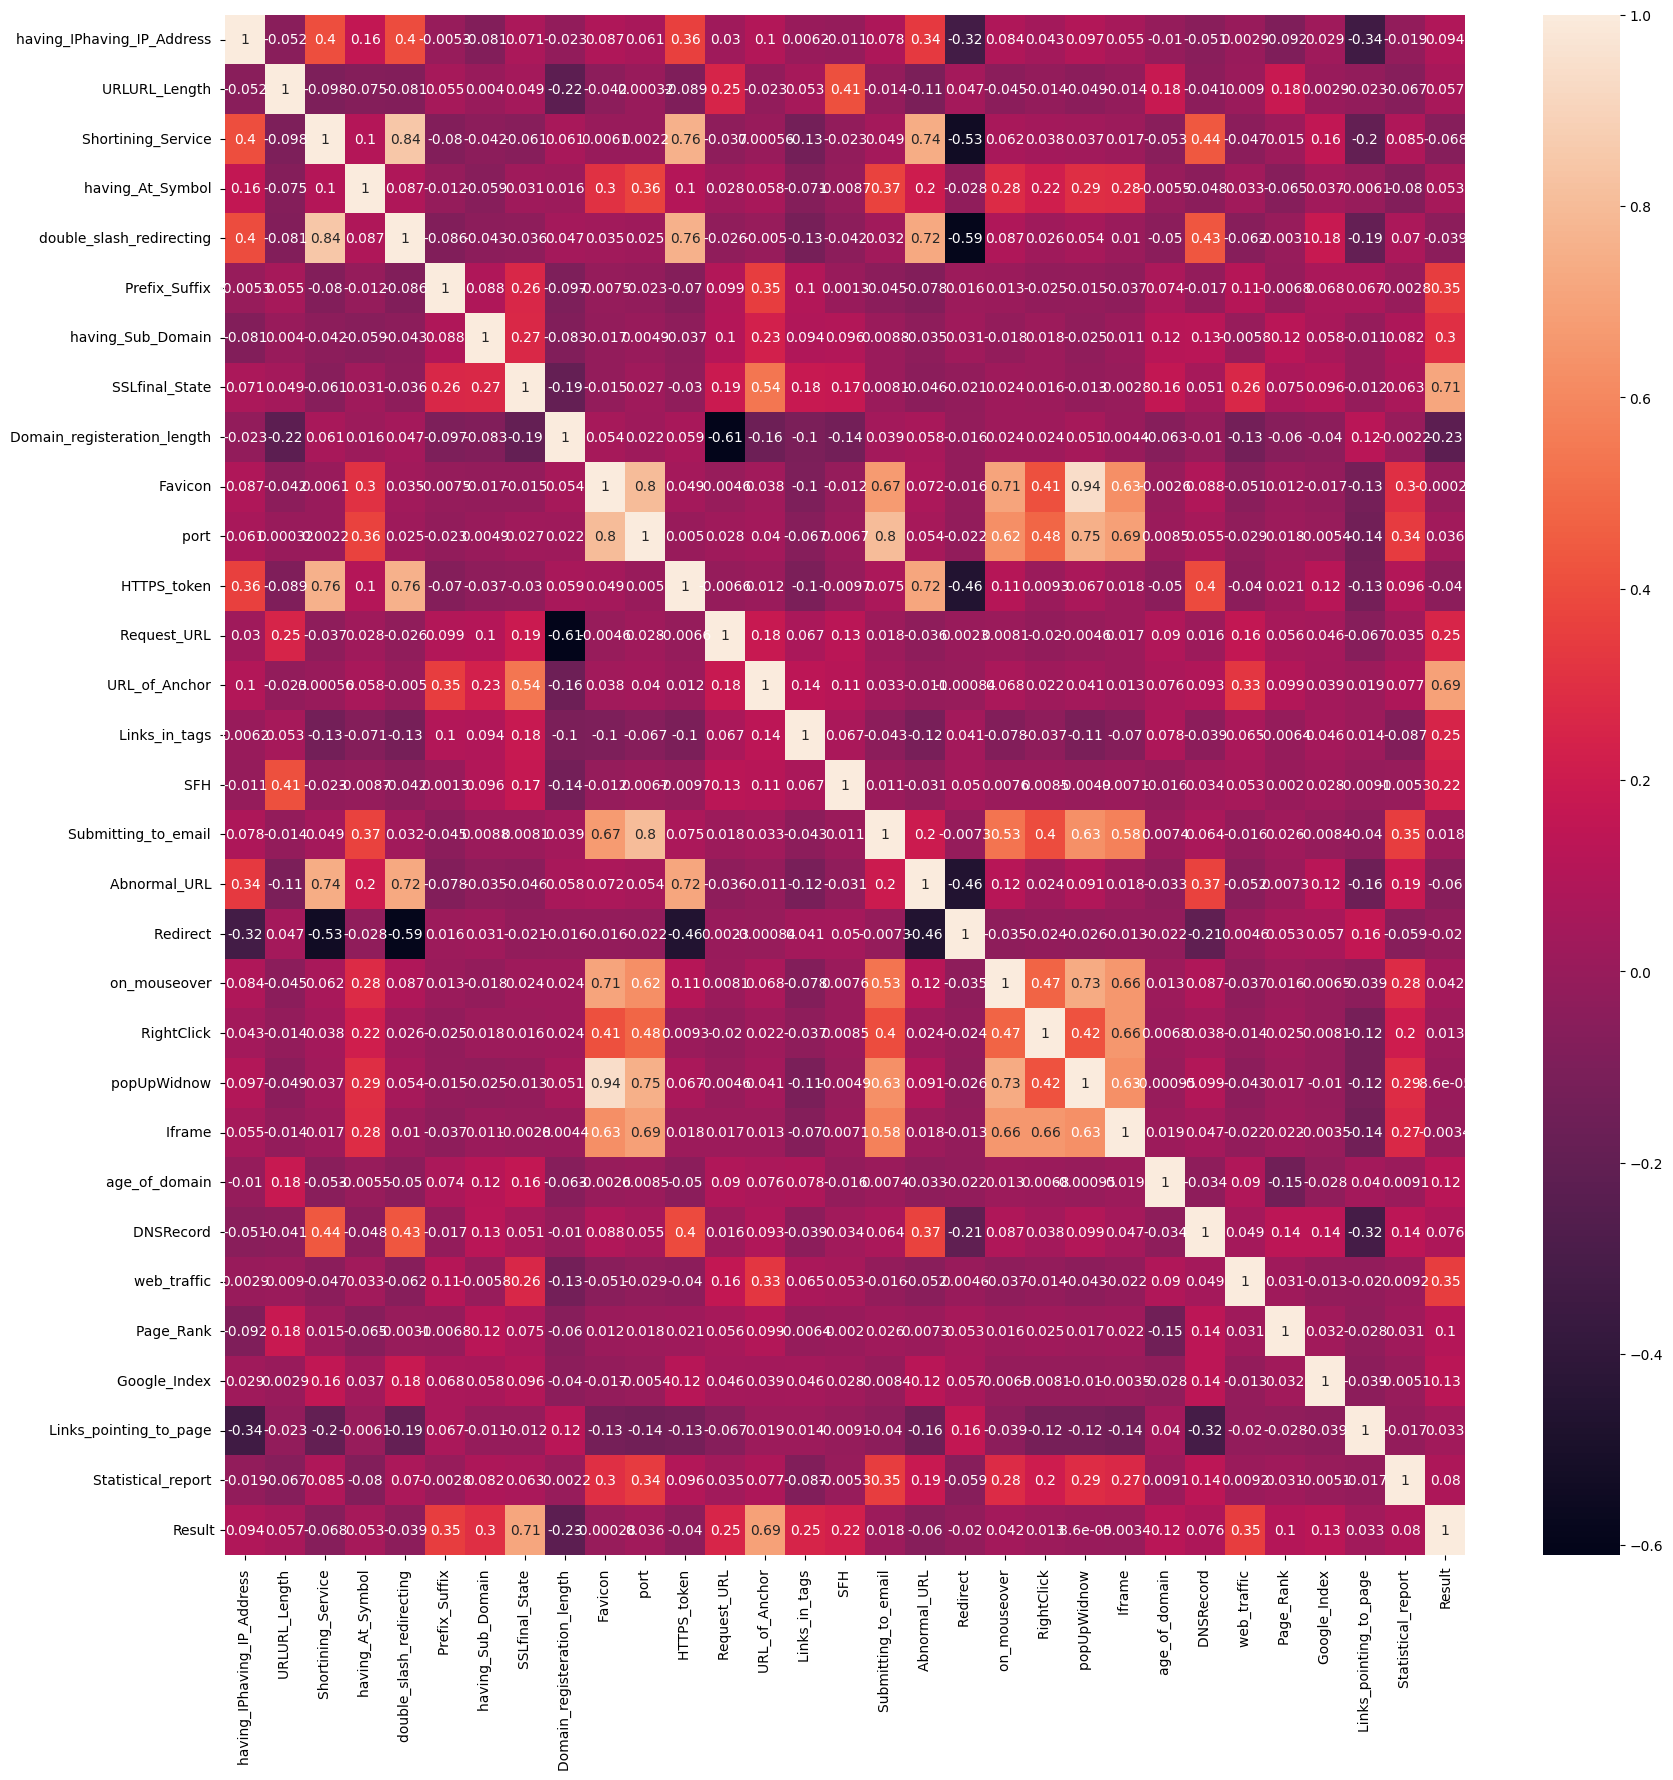

In [14]:
#Correlation heatmap

plt.figure(figsize=(20,20))
sns.heatmap(data1.corr(), annot=True)
plt.show()

### Distribution of Phishing and Legitimate Sites in Dataset

Result
1    6157
0    4898
Name: count, dtype: int64


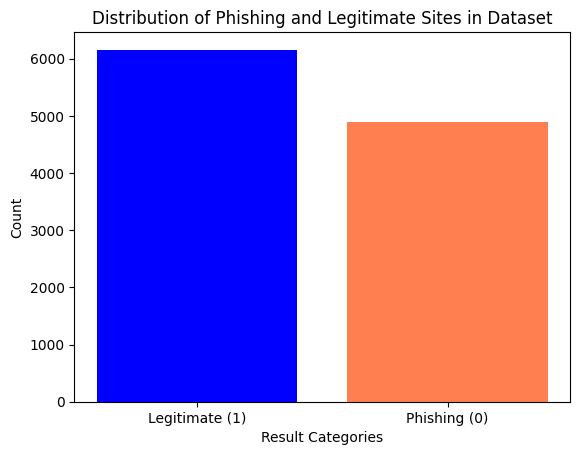

In [29]:
# Count the occurrences of each category in the 'Result' column
result_counts = data1['Result'].value_counts()
print(data1['Result'].value_counts())
# Defining colors for the bar chart based on the index of result_counts
# (assuming -1 for Phishing and 1 for Legitimate)
colors = ['Coral' if index == 0 else 'blue' for index in result_counts.index]

# Define labels for the categories
labels = ['Legitimate (1)','Phishing (0)']

# Create an enhanced bar chart
plt.bar(labels, result_counts.values, color=colors)
plt.xlabel('Result Categories')
plt.ylabel('Count')
plt.title('Distribution of Phishing and Legitimate Sites in Dataset')
plt.show()

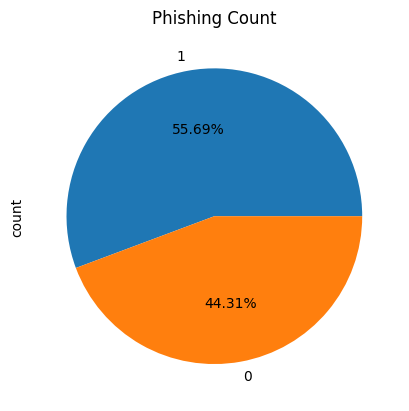

In [16]:
# Phishing Count in pie chart

data1['Result'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

The data seems pretty much balanced i.e. There is not a significant difference between the count of the target variable values.

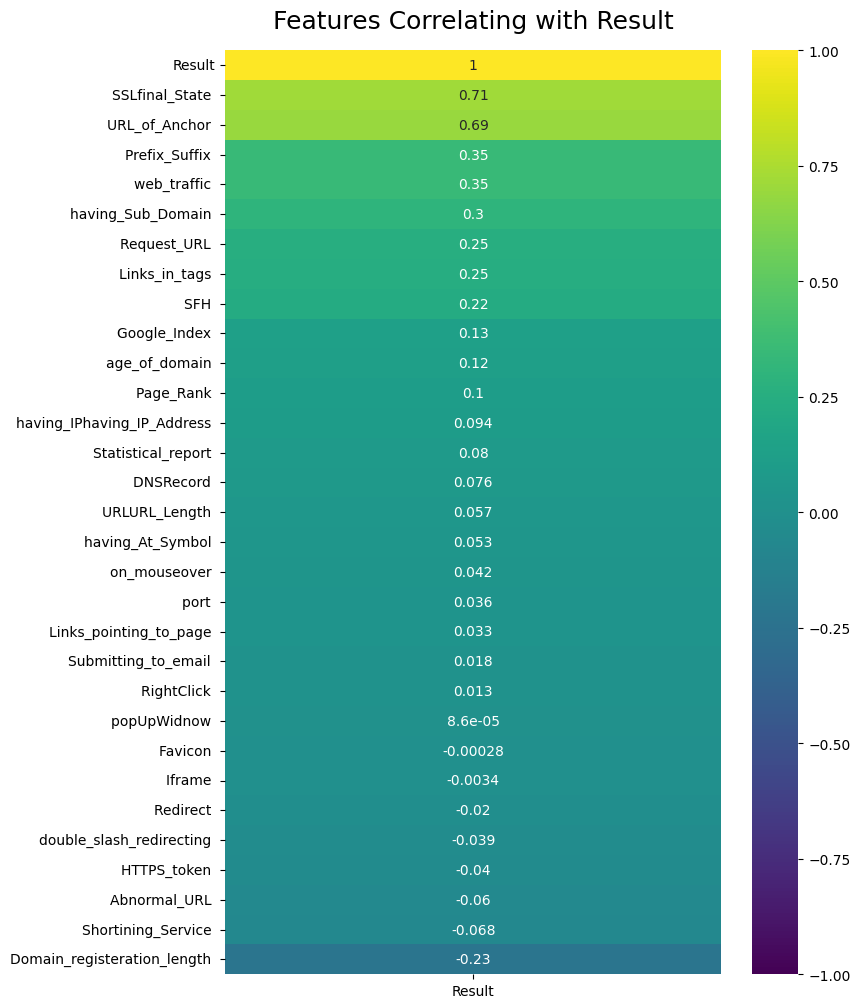

In [17]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data1.corr()[['Result']].sort_values(by='Result', ascending=False), vmin=-1, vmax=1, annot=True, cmap = 'viridis')
heatmap.set_title('Features Correlating with Result', fontdict={'fontsize':18}, pad=16);
plt.savefig('heatmapfeaturecorr.png', dpi=300, bbox_inches='tight')

## 4. Splitting the Data:
The data is split into train & test sets, 80-20 split.

In [239]:
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split
# from collections import Counter

# # Splitting the dataset into dependant and independant fetature

# X = data1.drop(["Result"],axis =1)
# y = data1["Result"]

# # Split the dataset into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Check the original class distribution
# print("Original class distribution:", Counter(y_train))

# # Apply SMOTE to the training data
# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# # Check the resampled class distribution
# print("Resampled class distribution:", Counter(y_train_smote))
# # Count the occurrences of each category in the 'Result' column
# result_counts = data1['Result'].value_counts()
# result_counts


In [240]:
# Splitting the dataset into dependant and independant fetature

X = data1.drop(["Result"],axis =1)
y = data1["Result"]

# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8844, 30), (8844,), (2211, 30), (2211,))

## Normalization

In [241]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import StandardScaler

# # Initialize the scaler
# scaler = StandardScaler()

# # Fit the scaler on your training data and transform both training and test data
# X_train_standardized = scaler.fit_transform(X_train)
# X_test_standardized = scaler.transform(X_test)

---

# Feature Selection and Dimensionality Reduction

To optimize model performance and reduce computational complexity, feature selection and dimensionality reduction techniques were employed. The goal was to select the most relevant features from the original 30-feature dataset while retaining critical information for the classification task. The following strategies were applied sequentially:

#### Step 1: Filter Strategy
The filter method was used as the initial step to reduce the number of features. The ANOVA F-test (`f_classif`) was applied to rank the features based on their significance relative to the target variable. The top 20 features were selected using the `SelectKBest` method. This approach ensures that only the most statistically significant features are passed on to the subsequent steps.

#### Step 2: Wrapper Strategy
To further narrow down the feature set, Recursive Feature Elimination (RFE) was employed using Logistic Regression as the estimator. RFE iteratively eliminates less important features until only the top 10 features remain. This wrapper method was particularly useful in identifying the subset of features that contributed most to model performance when considered together.

#### Step 3: Dimensionality Reduction
Principal Component Analysis (PCA) was then applied to the 10 selected features to reduce the feature set to 5 principal components. PCA captures the maximum variance in the data by creating new composite features that are linear combinations of the original features. The number of components was determined by analyzing the explained variance ratio to ensure that sufficient information was retained.

#### Consistency Across Training and Testing Data
To avoid data leakage and ensure consistency, the transformations were first fitted on the training data and then applied to the test data. The process was as follows:
1. **Fit on Training Data:** The `SelectKBest`, RFE, and PCA were all fitted on the training data (`X_train`) to determine the relevant features and principal components.
2. **Transform Test Data:** The learned transformations were then applied to the test data (`X_test`) using the `.transform()` method. This ensures that the test data remains unseen during training while undergoing the same feature selection and dimensionality reduction steps.

By sequentially applying filter, wrapper, and dimensionality reduction techniques, the dataset was reduced from 30 features to 5 principal components, significantly enhancing the model’s efficiency while maintaining predictive accuracy.


In [242]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif, RFECV, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.decomposition import PCA
import numpy as np

# Step 1: Perform Filter Strategy to Select Optimal Number of Features

# Use cross-validation to determine the optimal number of features for SelectKBest
scores = []
for k in range(1, 31):  # Assuming you have 30 features
    kbest = SelectKBest(score_func=f_classif, k=k)
    X_train_kbest = kbest.fit_transform(X_train, y_train)
    score = cross_val_score(LogisticRegression(), X_train_kbest, y_train, cv=5, scoring='accuracy').mean()
    scores.append(score)

# # Plot cross-validation scores vs. number of features selected
# plt.figure(figsize=(10, 6))
# plt.plot(range(1, 31), scores, marker='o')
# plt.xlabel('Number of Features Selected')
# plt.ylabel('Cross-Validation Accuracy')
# plt.title('Cross-Validation Accuracy vs. Number of Selected Features')
# plt.grid(True)
# plt.show()

# Identify the optimal number of features based on cross-validation
optimal_k = scores.index(max(scores)) + 1
print(f"Optimal number of features to select using SelectKBest: {optimal_k}")

# Select the optimal number of features using SelectKBest
kbest = SelectKBest(score_func=f_classif, k=optimal_k)
X_train_kbest = kbest.fit_transform(X_train, y_train)
X_test_kbest = kbest.transform(X_test)  # Apply the same transformation to X_test
selected_features_kbest = X.columns[kbest.get_support()]

# print(f"Selected Features using Filter Strategy (SelectKBest): {selected_features_kbest}")

# Step 2: Perform Wrapper Strategy using RFECV to Further Refine Feature Selection

# Initialize the model (Logistic Regression in this example)
model = LogisticRegression()

# Set up RFECV with cross-validation to find the optimal number of features
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train_kbest, y_train)

# # Plot the number of features vs. cross-validated score
# plt.figure(figsize=(10, 6))
# plt.xlabel("Number of Features Selected")
# plt.ylabel("Cross-Validation Score (Accuracy)")
# plt.title("Optimal Number of Features via RFECV")
# plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], marker='o')
# plt.grid(True)
# plt.axvline(x=rfecv.n_features_, color='r', linestyle='--', label=f'{rfecv.n_features_} features')
# plt.legend(loc='best')
# plt.show()

print(f"Optimal number of features selected by RFECV: {rfecv.n_features_}")

# Perform RFE with the optimal number of features determined by RFECV
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=rfecv.n_features_)
X_train_rfe = rfe.fit_transform(X_train_kbest, y_train)
X_test_rfe = rfe.transform(X_test_kbest)  # Apply the same transformation to X_test
selected_features_rfe = selected_features_kbest[rfe.get_support()]

# print(f"Final Selected Features after RFE: {selected_features_rfe}")

# Step 3: Perform PCA for Dimensionality Reduction

# Fit PCA on the RFE-transformed training data
pca = PCA().fit(X_train_rfe)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance
desired_variance = 0.95
n_components = np.argmax(cumulative_variance >= desired_variance) + 1

# # Plot the cumulative explained variance
# plt.figure(figsize=(10, 6))
# plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
# plt.axvline(x=n_components, color='r', linestyle='--', label=f'{n_components} components')
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.title('PCA - Cumulative Explained Variance vs. Number of Components')
# plt.legend(loc='best')
# plt.grid(True)
# plt.show()

print(f'Number of components that explain {desired_variance*100}% variance: {n_components}')

# Apply PCA with the determined number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_rfe)
X_test_pca = pca.transform(X_test_rfe)  # Apply the same transformation to X_test

# The reduced feature set (X_train_pca) is now ready for model training.
print("Final shape of the training data after PCA:", X_train_pca.shape)
X_train_pca.shape, y_train.shape, X_test_pca.shape, y_test.shape


Optimal number of features to select using SelectKBest: 30
Optimal number of features selected by RFECV: 30
Number of components that explain 95.0% variance: 21
Final shape of the training data after PCA: (8844, 21)


((8844, 21), (8844,), (2211, 21), (2211,))

# Model Building & Training:
   Supervised machine learning is one of the most commonly used and successful types of machine learning. Supervised learning is used whenever we want to predict a certain outcome/label from a given set of features, and we have examples of features-label pairs. We build a machine learning model from these features-label pairs, which comprise our training set. Our goal is to make accurate predictions for new, never-before-seen data.

   There are two major types of supervised machine learning problems, called classification and regression. Our data set comes under regression problem, as the prediction of suicide rate is a continuous number, or a floating-point number in programming terms. The supervised machine learning models (regression) considered to train the dataset in this notebook are:

1. Logistic Regression
2. k-Nearest Neighbors 
3. Support Vector Clasifier
4. Naive Bayes
5. Decision Tree
6. Random Forest
7. Gradient Boosting
8. Catboost
9. Xgboost
10. Multilayer Perceptrons

              
  The metrics considered to evaluate the model performance are Accuracy & F1 score.

In [41]:
# Creating holders to store the model performance results
ML_Model = []
ML_Config = []
accuracy = []
f1_score = []
recall = []
precision = []
auc_roc = []  # Adding a holder for AUC-ROC

# Function to call for storing the results
def storeResults(model,config, a, b, c, d, e):
    ML_Model.append(model)
    ML_Config.append(config)
    accuracy.append(round(a, 6))
    f1_score.append(round(b, 6))
    recall.append(round(c, 6))
    precision.append(round(d, 6))
    auc_roc.append(round(e, 6))

# Support Vector Machine : Classifier



In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif, RFECV, RFE
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn import metrics
import pandas as pd

# Assuming X and y are your features and labels
X = data1.drop(["Result"],axis =1)
y = data1["Result"]

# Step 1: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Step 3: Normalize the data
scaler = MinMaxScaler()
X_train_balanced_normalized = scaler.fit_transform(X_train_balanced)
X_test_normalized = scaler.transform(X_test)

# Now X_train_balanced_normalized and X_test_normalized are ready for model training and evaluation.

# Let's define a list to hold different configurations
configurations = []

# Step 4: Perform Feature Selection

# 4.1: Filter Strategy using SelectKBest
print("\n=== SelectKBest Feature Selection ===")
scores = []
for k in range(1, X_train.shape[1] + 1):  # Loop through possible numbers of features
    kbest = SelectKBest(score_func=f_classif, k=k)
    X_train_kbest = kbest.fit_transform(X_train_balanced_normalized, y_train_balanced)
    score = cross_val_score(SVC(kernel='linear'), X_train_kbest, y_train_balanced, cv=5, scoring='accuracy').mean()
    scores.append(score)

# Identify the optimal number of features
optimal_k = scores.index(max(scores)) + 1
print(f"Optimal number of features to select using SelectKBest: {optimal_k}")

# Apply SelectKBest with the optimal number of features
kbest = SelectKBest(score_func=f_classif, k=optimal_k)
X_train_kbest = kbest.fit_transform(X_train_balanced_normalized, y_train_balanced)
X_test_kbest = kbest.transform(X_test_normalized)  # Apply the same transformation to X_test
selected_features_kbest = X.columns[kbest.get_support()]
configurations.append(('SelectKBest', X_train_kbest, X_test_kbest))

# 4.2: Wrapper Strategy using RFECV with SVM
print("\n=== RFECV Feature Selection with SVM ===")
svm_estimator = SVC(kernel='linear')  # Using a linear kernel for feature selection

rfecv = RFECV(estimator=svm_estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train_kbest, y_train_balanced)

print(f"Optimal number of features selected by RFECV: {rfecv.n_features_}")

# Perform RFE with the optimal number of features determined by RFECV
rfe = RFE(estimator=svm_estimator, n_features_to_select=rfecv.n_features_)
X_train_rfe = rfe.fit_transform(X_train_kbest, y_train_balanced)
X_test_rfe = rfe.transform(X_test_kbest)  # Apply the same transformation to X_test
selected_features_rfe = selected_features_kbest[rfe.get_support()]
configurations.append(('RFECV', X_train_rfe, X_test_rfe))

# Step 5: Dimensionality Reduction using PCA
print("\n=== PCA Dimensionality Reduction ===")

# Fit PCA on the RFE-transformed training data
pca = PCA().fit(X_train_rfe)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance
desired_variance = 0.95
n_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f'Number of components that explain {desired_variance*100}% variance: {n_components}')

# Apply PCA with the determined number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_rfe)
X_test_pca = pca.transform(X_test_rfe)  # Apply the same transformation to X_test
configurations.append(('PCA', X_train_pca, X_test_pca))

# Step 6: Run SVM with Hyperparameter Tuning on different configurations
print("\n=== SVM Model Performance with Hyperparameter Tuning ===")

# Defining an expanded parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Add different C values for regularization
    'gamma': [1, 0.1, 0.01, 0.001],  # Explore a wider range of gamma values
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']  # Include additional kernels for non-linear classification
}

for name, X_train_cfg, X_test_cfg in configurations:
    print(f"\nRunning SVM with {name} configuration...")

    # GridSearchCV to find the best parameters for the SVC model
    svc = GridSearchCV(SVC(probability=True), param_grid, cv=5)  # Set probability=True for AUC-ROC calculation

    # Fitting the model for grid search with the training data
    svc.fit(X_train_cfg, y_train_balanced)

    # Predicting the target values for the training and test sets
    y_train_svc = svc.predict(X_train_cfg)
    y_test_svc = svc.predict(X_test_cfg)

    # Computing the probability scores for AUC-ROC (for the positive class)
    y_train_svc_proba = svc.predict_proba(X_train_cfg)[:, 1]  # Probability scores for the positive class
    y_test_svc_proba = svc.predict_proba(X_test_cfg)[:, 1]

    # Computing the metrics for the Support Vector Machine model
    metrics_dict = {
        "Dataset": ["Training", "Test"],
        "Accuracy": [
            metrics.accuracy_score(y_train_balanced, y_train_svc),
            metrics.accuracy_score(y_test, y_test_svc),
        ],
        "F1 Score": [
            metrics.f1_score(y_train_balanced, y_train_svc),
            metrics.f1_score(y_test, y_test_svc),
        ],
        "Recall": [
            metrics.recall_score(y_train_balanced, y_train_svc),
            metrics.recall_score(y_test, y_test_svc),
        ],
        "Precision": [
            metrics.precision_score(y_train_balanced, y_train_svc),
            metrics.precision_score(y_test, y_test_svc),
        ],
        "AUC-ROC": [
            metrics.roc_auc_score(y_train_balanced, y_train_svc_proba),
            metrics.roc_auc_score(y_test, y_test_svc_proba),
        ]
    }

    # Converting the metrics into a pandas DataFrame for better display
    df_metrics = pd.DataFrame(metrics_dict)

    # Display the metrics DataFrame
    print("\nSupport Vector Machine Model Performance Metrics")
    print(df_metrics.to_string(index=False))

    # Computing the classification report of the model
    print("\nClassification Report for the SVM Model:\n")
    print(metrics.classification_report(y_test, y_test_svc))

    # Storing the results, now including the AUC-ROC score
    storeResults('Support Vector Machine',name,
                 metrics.accuracy_score(y_test, y_test_svc),
                 metrics.f1_score(y_test, y_test_svc),
                 metrics.recall_score(y_test, y_test_svc),
                 metrics.precision_score(y_test, y_test_svc),
                 metrics.roc_auc_score(y_test, y_test_svc_proba))

    # Print the best hyperparameters
    print("Best hyperparameters found by GridSearchCV:")
    print(svc.best_params_)


=== SelectKBest Feature Selection ===
Optimal number of features to select using SelectKBest: 29

=== RFECV Feature Selection with SVM ===
Optimal number of features selected by RFECV: 27

=== PCA Dimensionality Reduction ===
Number of components that explain 95.0% variance: 21

=== SVM Model Performance with Hyperparameter Tuning ===

Running SVM with SelectKBest configuration...


KeyboardInterrupt: 

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif, RFECV, RFE
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn import metrics
import pandas as pd

# Assuming X and y are your features and labels
# Assuming X and y are your features and labels
X = data1.drop(["Result"],axis =1)
y = data1["Result"]

# Step 1: Split the dataset into training and test sets (before any preprocessing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configuration list to store different data setups
configurations = []

# Configuration 1: Before any preprocessing (original data)
configurations.append(('Original Data', X_train, X_test, y_train))

# Step 2: Normalize the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Configuration 2: After Normalization (but before oversampling)
configurations.append(('Normalized Data', X_train_normalized, X_test_normalized, y_train))

# Step 3: Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Configuration 3: After SMOTE (before normalization)
configurations.append(('After SMOTE', X_train_balanced, X_test, y_train_balanced))

# Step 4: Apply SMOTE followed by Normalization
X_train_balanced_normalized = scaler.fit_transform(X_train_balanced)
X_test_normalized_smote = scaler.transform(X_test)  # Apply the same scaling to the test set

# Configuration 4: After SMOTE and Normalization
configurations.append(('SMOTE and Normalization', X_train_balanced_normalized, X_test_normalized_smote, y_train_balanced))

# Step 5: Feature Selection and PCA after SMOTE + Normalization
# 5.1: SelectKBest
print("\n=== SelectKBest Feature Selection ===")
scores = []
for k in range(1, X_train.shape[1] + 1):  # Loop through possible numbers of features
    kbest = SelectKBest(score_func=f_classif, k=k)
    X_train_kbest = kbest.fit_transform(X_train_balanced_normalized, y_train_balanced)
    score = cross_val_score(SVC(kernel='linear'), X_train_kbest, y_train_balanced, cv=5, scoring='accuracy').mean()
    scores.append(score)

# Identify the optimal number of features
optimal_k = scores.index(max(scores)) + 1
print(f"Optimal number of features to select using SelectKBest: {optimal_k}")

# Apply SelectKBest with the optimal number of features
kbest = SelectKBest(score_func=f_classif, k=optimal_k)
X_train_kbest = kbest.fit_transform(X_train_balanced_normalized, y_train_balanced)
X_test_kbest = kbest.transform(X_test_normalized_smote)  # Apply the same transformation to X_test
selected_features_kbest = X.columns[kbest.get_support()]
configurations.append(('SelectKBest', X_train_kbest, X_test_kbest, y_train_balanced))

# 5.2: RFECV with SVM
print("\n=== RFECV Feature Selection with SVM ===")
svm_estimator = SVC(kernel='linear')  # Using a linear kernel for feature selection

rfecv = RFECV(estimator=svm_estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train_kbest, y_train_balanced)

print(f"Optimal number of features selected by RFECV: {rfecv.n_features_}")

# Perform RFE with the optimal number of features determined by RFECV
rfe = RFE(estimator=svm_estimator, n_features_to_select=rfecv.n_features_)
X_train_rfe = rfe.fit_transform(X_train_kbest, y_train_balanced)
X_test_rfe = rfe.transform(X_test_kbest)  # Apply the same transformation to X_test
selected_features_rfe = selected_features_kbest[rfe.get_support()]
configurations.append(('RFECV', X_train_rfe, X_test_rfe, y_train_balanced))

# 5.3: PCA for Dimensionality Reduction
print("\n=== PCA Dimensionality Reduction ===")

# Fit PCA on the RFE-transformed training data
pca = PCA().fit(X_train_rfe)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance
desired_variance = 0.95
n_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f'Number of components that explain {desired_variance*100}% variance: {n_components}')

# Apply PCA with the determined number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_rfe)
X_test_pca = pca.transform(X_test_rfe)  # Apply the same transformation to X_test
configurations.append(('PCA', X_train_pca, X_test_pca, y_train_balanced))

# Step 6: Run SVM with Hyperparameter Tuning on different configurations
print("\n=== SVM Model Performance with Hyperparameter Tuning ===")

# # Defining an expanded parameter grid for hyperparameter tuning
# param_grid = {
#     'C': [0.1, 1, 10, 100],  # Add different C values for regularization
#     'gamma': [1, 0.1, 0.01, 0.001],  # Explore a wider range of gamma values
#     'kernel': ['rbf', 'linear', 'poly', 'sigmoid']  # Include additional kernels for non-linear classification
# }
# Defining an expanded parameter grid for hyperparameter tuning
param_grid = {
    'C': [100],  # Add different C values for regularization
    'gamma': [0.1],  # Explore a wider range of gamma values
    'kernel': ['rbf']  # Include additional kernels for non-linear classification
}
for name, X_train_cfg, X_test_cfg, y_train_cfg in configurations:
    print(f"\nRunning SVM with {name} configuration...")

    # GridSearchCV to find the best parameters for the SVC model
    svc = GridSearchCV(SVC(probability=True), param_grid, cv=5)  # Set probability=True for AUC-ROC calculation

    # Fitting the model for grid search with the training data
    svc.fit(X_train_cfg, y_train_cfg)

    # Predicting the target values for the training and test sets
    y_train_svc = svc.predict(X_train_cfg)
    y_test_svc = svc.predict(X_test_cfg)

    # Computing the probability scores for AUC-ROC (for the positive class)
    y_train_svc_proba = svc.predict_proba(X_train_cfg)[:, 1]  # Probability scores for the positive class
    y_test_svc_proba = svc.predict_proba(X_test_cfg)[:, 1]

    # Computing the metrics for the Support Vector Machine model
    metrics_dict = {
        "Dataset": ["Training", "Test"],
        "Accuracy": [
            metrics.accuracy_score(y_train_cfg, y_train_svc),
            metrics.accuracy_score(y_test, y_test_svc),
        ],
        "F1 Score": [
            metrics.f1_score(y_train_cfg, y_train_svc),
            metrics.f1_score(y_test, y_test_svc),
        ],
        "Recall": [
            metrics.recall_score(y_train_cfg, y_train_svc),
            metrics.recall_score(y_test, y_test_svc),
        ],
        "Precision": [
            metrics.precision_score(y_train_cfg, y_train_svc),
            metrics.precision_score(y_test, y_test_svc),
        ],
        "AUC-ROC": [
            metrics.roc_auc_score(y_train_cfg, y_train_svc_proba),
            metrics.roc_auc_score(y_test, y_test_svc_proba),
        ]
    }

    # Converting the metrics into a pandas DataFrame for better display
    df_metrics = pd.DataFrame(metrics_dict)

    # Display the metrics DataFrame
    print("\nSupport Vector Machine Model Performance Metrics")
    print(df_metrics.to_string(index=False))

    # Computing the classification report of the model
    print("\nClassification Report for the SVM Model:\n")
    print(metrics.classification_report(y_test, y_test_svc))

    # Storing the results, now including the AUC-ROC score
    storeResults('Support Vector Machine',
                 name,
                 metrics.accuracy_score(y_test, y_test_svc),
                 metrics.f1_score(y_test, y_test_svc),
                 metrics.recall_score(y_test, y_test_svc),
                 metrics.precision_score(y_test, y_test_svc),
                 metrics.roc_auc_score(y_test, y_test_svc_proba))

    # Print the best hyperparameters
    print("Best hyperparameters found by GridSearchCV:")
    print(svc.best_params_)


=== SelectKBest Feature Selection ===
Optimal number of features to select using SelectKBest: 29

=== RFECV Feature Selection with SVM ===
Optimal number of features selected by RFECV: 27

=== PCA Dimensionality Reduction ===
Number of components that explain 95.0% variance: 21

=== SVM Model Performance with Hyperparameter Tuning ===

Running SVM with Original Data configuration...

Support Vector Machine Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  0.989711  0.990744 0.993472   0.988030 0.997797
    Test  0.966079  0.970367 0.978486   0.962382 0.988895

Classification Report for the SVM Model:

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.96      0.97      2211
weighted avg       0.97      0.97      0.97      2211

Best hyperparameter

### without feature engineering

In [244]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import pandas as pd

# Defining an expanded parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Add different C values for regularization
    'gamma': [1, 0.1, 0.01, 0.001],  # Explore a wider range of gamma values
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']  # Include additional kernels for non-linear classification
}

# param_grid = {
#     'C': [100],  # Add different C values for regularization
#     'gamma': [0.1],  # Explore a wider range of gamma values
#     'kernel': ['rbf']  # Include additional kernels for non-linear classification
# }

# GridSearchCV to find the best parameters for the SVC model
svc = GridSearchCV(SVC(probability=True), param_grid, cv=5)  # Set probability=True for AUC-ROC calculation

# Fitting the model for grid search with the training data
svc.fit(X_train, y_train)

# Predicting the target values for the training and test sets
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

# Computing the probability scores for AUC-ROC (for the positive class)
y_train_svc_proba = svc.predict_proba(X_train)[:, 1]  # Probability scores for the positive class
y_test_svc_proba = svc.predict_proba(X_test)[:, 1]

# Computing the metrics for the Support Vector Machine model
metrics_dict = {
    "Dataset": ["Training", "Test"],
    "Accuracy": [
        metrics.accuracy_score(y_train, y_train_svc),
        metrics.accuracy_score(y_test, y_test_svc),
    ],
    "F1 Score": [
        metrics.f1_score(y_train, y_train_svc),
        metrics.f1_score(y_test, y_test_svc),
    ],
    "Recall": [
        metrics.recall_score(y_train, y_train_svc),
        metrics.recall_score(y_test, y_test_svc),
    ],
    "Precision": [
        metrics.precision_score(y_train, y_train_svc),
        metrics.precision_score(y_test, y_test_svc),
    ],
    "AUC-ROC": [
        metrics.roc_auc_score(y_train, y_train_svc_proba),
        metrics.roc_auc_score(y_test, y_test_svc_proba),
    ]
}

# Converting the metrics into a pandas DataFrame for better display
df_metrics = pd.DataFrame(metrics_dict)

# Display the metrics DataFrame
print("\nSupport Vector Machine Model Performance Metrics")
print(df_metrics.to_string(index=False))

# Computing the classification report of the model
print("\nClassification Report for the SVM Model:\n")
print(metrics.classification_report(y_test, y_test_svc))

# Storing the results, now including the AUC-ROC score
storeResults('Support Vector Machine',
             metrics.accuracy_score(y_test, y_test_svc),
             metrics.f1_score(y_test, y_test_svc),
             metrics.recall_score(y_test, y_test_svc),
             metrics.precision_score(y_test, y_test_svc),
             metrics.roc_auc_score(y_test, y_test_svc_proba))

# Print the best hyperparameters
print("Best hyperparameters found by GridSearchCV:")
print(svc.best_params_)


Support Vector Machine Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  0.989711  0.990744 0.993472   0.988030 0.997797
    Test  0.966079  0.970367 0.978486   0.962382 0.988896

Classification Report for the SVM Model:

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.96      0.97      2211
weighted avg       0.97      0.97      0.97      2211

Best hyperparameters found by GridSearchCV:
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


### with feature engineering

In [215]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import pandas as pd

# Defining an expanded parameter grid for hyperparameter tuning
# param_grid = {
#     'C': [0.1, 1, 10, 100],  # Add different C values for regularization
#     'gamma': [1, 0.1, 0.01, 0.001],  # Explore a wider range of gamma values
#     'kernel': ['rbf', 'linear', 'poly', 'sigmoid']  # Include additional kernels for non-linear classification
# }

param_grid = {
    'C': [100],  # Add different C values for regularization
    'gamma': [0.1],  # Explore a wider range of gamma values
    'kernel': ['rbf']  # Include additional kernels for non-linear classification
}

# GridSearchCV to find the best parameters for the SVC model
svc = GridSearchCV(SVC(probability=True), param_grid, cv=5)  # Set probability=True for AUC-ROC calculation

# Fitting the model for grid search with the training data
svc.fit(X_train_pca, y_train)

# Predicting the target values for the training and test sets
y_train_svc = svc.predict(X_train_pca)
y_test_svc = svc.predict(X_test_pca)

# Computing the probability scores for AUC-ROC (for the positive class)
y_train_svc_proba = svc.predict_proba(X_train_pca)[:, 1]  # Probability scores for the positive class
y_test_svc_proba = svc.predict_proba(X_test_pca)[:, 1]

# Computing the metrics for the Support Vector Machine model
metrics_dict = {
    "Dataset": ["Training", "Test"],
    "Accuracy": [
        metrics.accuracy_score(y_train, y_train_svc),
        metrics.accuracy_score(y_test, y_test_svc),
    ],
    "F1 Score": [
        metrics.f1_score(y_train, y_train_svc),
        metrics.f1_score(y_test, y_test_svc),
    ],
    "Recall": [
        metrics.recall_score(y_train, y_train_svc),
        metrics.recall_score(y_test, y_test_svc),
    ],
    "Precision": [
        metrics.precision_score(y_train, y_train_svc),
        metrics.precision_score(y_test, y_test_svc),
    ],
    "AUC-ROC": [
        metrics.roc_auc_score(y_train, y_train_svc_proba),
        metrics.roc_auc_score(y_test, y_test_svc_proba),
    ]
}

# Converting the metrics into a pandas DataFrame for better display
df_metrics = pd.DataFrame(metrics_dict)

# Display the metrics DataFrame
print("\nSupport Vector Machine Model Performance Metrics")
print(df_metrics.to_string(index=False))

# Computing the classification report of the model
print("\nClassification Report for the SVM Model:\n")
print(metrics.classification_report(y_test, y_test_svc))

# Storing the results, now including the AUC-ROC score
storeResults('Support Vector Machine',
             metrics.accuracy_score(y_test, y_test_svc),
             metrics.f1_score(y_test, y_test_svc),
             metrics.recall_score(y_test, y_test_svc),
             metrics.precision_score(y_test, y_test_svc),
             metrics.roc_auc_score(y_test, y_test_svc_proba))

# Print the best hyperparameters
print("Best hyperparameters found by GridSearchCV:")
print(svc.best_params_)



Support Vector Machine Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  0.975124  0.977665 0.982252   0.973120 0.995027
    Test  0.957938  0.963197 0.969721   0.956761 0.987915

Classification Report for the SVM Model:

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       956
           1       0.96      0.97      0.96      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211

Best hyperparameters found by GridSearchCV:
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [245]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import pandas as pd

# Defining an expanded parameter grid for hyperparameter tuning
param_grid = {
    'C': [100],  # Add different C values for regularization
    'gamma': [0.1],  # Explore a wider range of gamma values
    'kernel': ['rbf']  # Include additional kernels for non-linear classification
}

# GridSearchCV to find the best parameters for the SVC model
svc = GridSearchCV(SVC(probability=True), param_grid, cv=5)  # Set probability=True for AUC-ROC calculation

# Fitting the model for grid search with the training data
svc.fit(X_train_smote, y_train_smote)

# Predicting the target values for the training and test sets
y_train_svc = svc.predict(X_train_smote)
y_test_svc = svc.predict(X_test)

# Computing the probability scores for AUC-ROC (for the positive class)
y_train_svc_proba = svc.predict_proba(X_train_smote)[:, 1]  # Probability scores for the positive class
y_test_svc_proba = svc.predict_proba(X_test)[:, 1]

# Computing the metrics for the Support Vector Machine model
metrics_dict = {
    "Dataset": ["Training", "Test"],
    "Accuracy": [
        metrics.accuracy_score(y_train_smote, y_train_svc),
        metrics.accuracy_score(y_test, y_test_svc),
    ],
    "F1 Score": [
        metrics.f1_score(y_train_smote, y_train_svc),
        metrics.f1_score(y_test, y_test_svc),
    ],
    "Recall": [
        metrics.recall_score(y_train_smote, y_train_svc),
        metrics.recall_score(y_test, y_test_svc),
    ],
    "Precision": [
        metrics.precision_score(y_train_smote, y_train_svc),
        metrics.precision_score(y_test, y_test_svc),
    ],
    "AUC-ROC": [
        metrics.roc_auc_score(y_train_smote, y_train_svc_proba),
        metrics.roc_auc_score(y_test, y_test_svc_proba),
    ]
}

# Converting the metrics into a pandas DataFrame for better display
df_metrics = pd.DataFrame(metrics_dict)

# Display the metrics DataFrame
print("\nSupport Vector Machine Model Performance Metrics")
print(df_metrics.to_string(index=False))

# Computing the classification report of the model
print("\nClassification Report for the SVM Model:\n")
print(metrics.classification_report(y_test, y_test_svc))

# Storing the results, now including the AUC-ROC score
storeResults('Support Vector Machine',
             metrics.accuracy_score(y_test, y_test_svc),
             metrics.f1_score(y_test, y_test_svc),
             metrics.recall_score(y_test, y_test_svc),
             metrics.precision_score(y_test, y_test_svc),
             metrics.roc_auc_score(y_test, y_test_svc_proba))




Support Vector Machine Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  0.989596  0.989626 0.992452   0.986815 0.998272
    Test  0.962913  0.967589 0.975299   0.960000 0.988169

Classification Report for the SVM Model:

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [219]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import metrics
import pandas as pd

# Define an expanded parameter grid for hyperparameter tuning
param_grid = {
    'model__C': [100],  # Add different C values for regularization
    'model__gamma': [0.1],  # Explore a wider range of gamma values
    'model__kernel': ['rbf']  # Include additional kernels for non-linear classification
}

# Create a pipeline that integrates SMOTE and the SVC model
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', SVC(probability=True))
])

# GridSearchCV to find the best parameters for the SVC model with 10-fold cross-validation
svc = GridSearchCV(pipeline, param_grid, cv=10)  # Set cv=10 for 10-fold cross-validation

# Fit the model using cross-validation
svc.fit(X_train, y_train)

# Cross-validation scores (accuracy) for each fold
cv_scores = cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy')

# Print the mean cross-validation accuracy
print(f"Mean Cross-Validation Accuracy (10-fold): {cv_scores.mean():.3f}")

# Predicting the target values for the test set
y_test_svc = svc.predict(X_test)

# Computing the probability scores for AUC-ROC (for the positive class)
y_test_svc_proba = svc.predict_proba(X_test)[:, 1]

# Computing the metrics for the Support Vector Machine model
metrics_dict = {
    "Dataset": ["Cross-Validation (10-fold)", "Test"],
    "Accuracy": [
        cv_scores.mean(),  # Mean cross-validation accuracy
        metrics.accuracy_score(y_test, y_test_svc),
    ],
    "F1 Score": [
        None,  # F1-score isn't directly calculated from cross_val_score in this setup
        metrics.f1_score(y_test, y_test_svc),
    ],
    "Recall": [
        None,  # Recall isn't directly calculated from cross_val_score in this setup
        metrics.recall_score(y_test, y_test_svc),
    ],
    "Precision": [
        None,  # Precision isn't directly calculated from cross_val_score in this setup
        metrics.precision_score(y_test, y_test_svc),
    ],
    "AUC-ROC": [
        None,  # AUC-ROC isn't directly calculated from cross_val_score in this setup
        metrics.roc_auc_score(y_test, y_test_svc_proba),
    ]
}

# Converting the metrics into a pandas DataFrame for better display
df_metrics = pd.DataFrame(metrics_dict)

# Display the metrics DataFrame
print("\nSupport Vector Machine Model Performance Metrics")
print(df_metrics.to_string(index=False))

# Computing the classification report of the model
print("\nClassification Report for the SVM Model:\n")
print(metrics.classification_report(y_test, y_test_svc))

# Storing the results, now including the AUC-ROC score
storeResults('Support Vector Machine',
             metrics.accuracy_score(y_test, y_test_svc),
             metrics.f1_score(y_test, y_test_svc),
             metrics.recall_score(y_test, y_test_svc),
             metrics.precision_score(y_test, y_test_svc),
             metrics.roc_auc_score(y_test, y_test_svc_proba))


Mean Cross-Validation Accuracy (10-fold): 0.965

Support Vector Machine Model Performance Metrics
                   Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Cross-Validation (10-fold)  0.965174       NaN      NaN        NaN      NaN
                      Test  0.962913  0.967589 0.975299       0.96 0.988169

Classification Report for the SVM Model:

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



# Random Forest : Classifier


### with feature engineering

### without feature engineering

In [247]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import pandas as pd

# Defining a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV to find the best parameters for the RandomForestClassifier
rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)  # 5-fold cross-validation

# Fitting the model for grid search with the training data
rf.fit(X_train, y_train)

# Predicting the target values for the training and test sets
y_train_rf = rf.predict(X_train)
y_test_rf = rf.predict(X_test)

# Computing the probability scores for AUC-ROC (for the positive class)
y_train_rf_proba = rf.predict_proba(X_train)[:, 1]  # Probability scores for the positive class
y_test_rf_proba = rf.predict_proba(X_test)[:, 1]

# Computing the metrics for the Random Forest model
metrics_dict = {
    "Dataset": ["Training", "Test"],
    "Accuracy": [
        metrics.accuracy_score(y_train, y_train_rf),
        metrics.accuracy_score(y_test, y_test_rf),
    ],
    "F1 Score": [
        metrics.f1_score(y_train, y_train_rf),
        metrics.f1_score(y_test, y_test_rf),
    ],
    "Recall": [
        metrics.recall_score(y_train, y_train_rf),
        metrics.recall_score(y_test, y_test_rf),
    ],
    "Precision": [
        metrics.precision_score(y_train, y_train_rf),
        metrics.precision_score(y_test, y_test_rf),
    ],
    "AUC-ROC": [
        metrics.roc_auc_score(y_train, y_train_rf_proba),
        metrics.roc_auc_score(y_test, y_test_rf_proba),
    ]
}

# Converting the metrics into a pandas DataFrame for better display
df_metrics = pd.DataFrame(metrics_dict)

# Display the metrics DataFrame
print("\nRandom Forest Model Performance Metrics")
print(df_metrics.to_string(index=False))

# Computing the classification report of the model
print("\nClassification Report for the Random Forest Model:\n")
print(metrics.classification_report(y_test, y_test_rf))

# Storing the results, now including the AUC-ROC score
storeResults('Random Forest',
             metrics.accuracy_score(y_test, y_test_rf),
             metrics.f1_score(y_test, y_test_rf),
             metrics.recall_score(y_test, y_test_rf),
             metrics.precision_score(y_test, y_test_rf),
             metrics.roc_auc_score(y_test, y_test_rf_proba))

# Print the best hyperparameters
print("Best hyperparameters found by GridSearchCV:")
print(rf.best_params_)



Random Forest Model Performance Metrics
 Dataset  Accuracy  F1 Score   Recall  Precision  AUC-ROC
Training  0.990615  0.991538 0.992044   0.991033 0.999774
    Test  0.965626  0.969889 0.975299   0.964539 0.991125

Classification Report for the Random Forest Model:

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.97      0.97      0.97      2211

Best hyperparameters found by GridSearchCV:
{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Best hyperparameters found by GridSearchCV:
{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

In [ ]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.990
Random Forest : Accuracy on test Data: 0.967

Random Forest : f1_score on training Data: 0.991
Random Forest : f1_score on test Data: 0.971

Random Forest : Recall on training Data: 0.991
Random Forest : Recall on test Data: 0.972

Random Forest : precision on training Data: 0.991
Random Forest : precision on test Data: 0.965


In [ ]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

          -1       0.97      0.96      0.96       976
           1       0.97      0.97      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



## 5.7.Gradient Boosting Classifier
Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting. Boosting algorithms play a crucial role in dealing with bias variance trade-off.  Unlike bagging algorithms, which only controls for high variance in a model, boosting controls both the aspects (bias & variance), and is considered to be more effective. 

In [ ]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [ ]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [ ]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.989
Gradient Boosting Classifier : Accuracy on test Data: 0.974

Gradient Boosting Classifier : f1_score on training Data: 0.990
Gradient Boosting Classifier : f1_score on test Data: 0.977

Gradient Boosting Classifier : Recall on training Data: 0.994
Gradient Boosting Classifier : Recall on test Data: 0.989

Gradient Boosting Classifier : precision on training Data: 0.986
Gradient Boosting Classifier : precision on test Data: 0.966


In [ ]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

          -1       0.99      0.96      0.97       976
           1       0.97      0.99      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.98      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



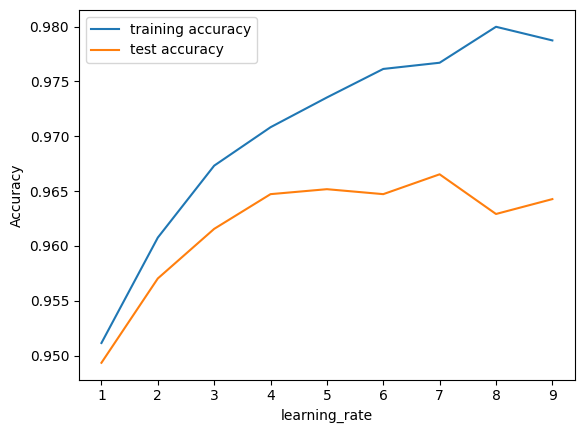

In [ ]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

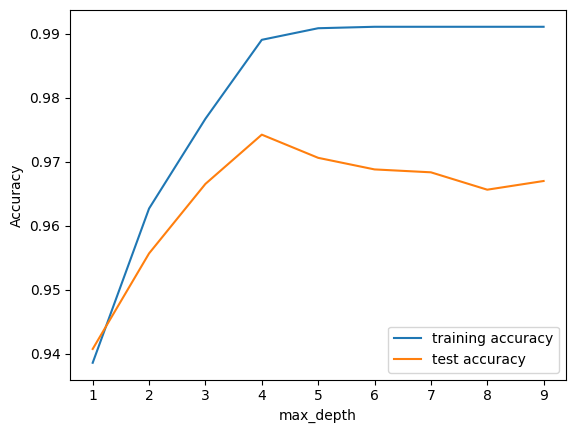

In [ ]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

## 5.8. CatBoost Classifier

CatBoost is a recently open-sourced machine learning algorithm from Yandex. It can easily integrate with deep learning frameworks like Google’s TensorFlow and Apple’s Core ML. It can work with diverse data types to help solve a wide range of problems that businesses face today.

In [ ]:
#  catboost Classifier Model
from catboost import CatBoostClassifier

# instantiate the model
cat = CatBoostClassifier(learning_rate  = 0.1)

# fit the model 
cat.fit(X_train,y_train)

ModuleNotFoundError: No module named 'catboost'

In [ ]:
#predicting the target value from the model for the samples
y_train_cat = cat.predict(X_train)
y_test_cat = cat.predict(X_test)


In [ ]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_cat  = metrics.accuracy_score(y_train,y_train_cat)
acc_test_cat = metrics.accuracy_score(y_test,y_test_cat)
print("CatBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_cat))
print("CatBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_cat))
print()

f1_score_train_cat = metrics.f1_score(y_train,y_train_cat)
f1_score_test_cat = metrics.f1_score(y_test,y_test_cat)
print("CatBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_cat))
print("CatBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_cat))
print()

recall_score_train_cat = metrics.recall_score(y_train,y_train_cat)
recall_score_test_cat = metrics.recall_score(y_test,y_test_cat)
print("CatBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_cat))
print("CatBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_test_cat))
print()

precision_score_train_cat = metrics.precision_score(y_train,y_train_cat)
precision_score_test_cat = metrics.precision_score(y_test,y_test_cat)
print("CatBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_cat))
print("CatBoost Classifier : precision on test Data: {:.3f}".format(precision_score_test_cat))

CatBoost Classifier : Accuracy on training Data: 0.991
CatBoost Classifier : Accuracy on test Data: 0.972

CatBoost Classifier : f1_score on training Data: 0.992
CatBoost Classifier : f1_score on test Data: 0.975

CatBoost Classifier : Recall on training Data: 0.994
CatBoost Classifier : Recall on test Data: 0.982

CatBoost Classifier : precision on training Data: 0.989
CatBoost Classifier : precision on test Data: 0.969


In [ ]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_cat))

              precision    recall  f1-score   support

          -1       0.98      0.96      0.97       976
           1       0.97      0.98      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [ ]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  CatBoostClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

0:	learn: 0.5487232	total: 8.02ms	remaining: 8.02s
1:	learn: 0.4349357	total: 21.3ms	remaining: 10.6s
2:	learn: 0.3609236	total: 35.8ms	remaining: 11.9s
3:	learn: 0.3050829	total: 42.6ms	remaining: 10.6s
4:	learn: 0.2766620	total: 51.4ms	remaining: 10.2s
5:	learn: 0.2475476	total: 58.3ms	remaining: 9.65s
6:	learn: 0.2286637	total: 66.9ms	remaining: 9.5s
7:	learn: 0.2138754	total: 72ms	remaining: 8.92s
8:	learn: 0.2013643	total: 77.6ms	remaining: 8.54s
9:	learn: 0.1896378	total: 82.4ms	remaining: 8.16s
10:	learn: 0.1819539	total: 88.8ms	remaining: 7.98s
11:	learn: 0.1767867	total: 93.7ms	remaining: 7.72s
12:	learn: 0.1727735	total: 98.9ms	remaining: 7.51s
13:	learn: 0.1682578	total: 105ms	remaining: 7.38s
14:	learn: 0.1641759	total: 110ms	remaining: 7.22s
15:	learn: 0.1614218	total: 115ms	remaining: 7.09s
16:	learn: 0.1558968	total: 120ms	remaining: 6.95s
17:	learn: 0.1535881	total: 127ms	remaining: 6.93s
18:	learn: 0.1514228	total: 132ms	remaining: 6.81s
19:	learn: 0.1482580	total: 137

167:	learn: 0.0547805	total: 968ms	remaining: 4.79s
168:	learn: 0.0546642	total: 973ms	remaining: 4.79s
169:	learn: 0.0543574	total: 979ms	remaining: 4.78s
170:	learn: 0.0542539	total: 985ms	remaining: 4.78s
171:	learn: 0.0540977	total: 991ms	remaining: 4.77s
172:	learn: 0.0539741	total: 996ms	remaining: 4.76s
173:	learn: 0.0537793	total: 1s	remaining: 4.75s
174:	learn: 0.0535499	total: 1.01s	remaining: 4.74s
175:	learn: 0.0533461	total: 1.01s	remaining: 4.74s
176:	learn: 0.0531326	total: 1.02s	remaining: 4.73s
177:	learn: 0.0530595	total: 1.02s	remaining: 4.72s
178:	learn: 0.0529470	total: 1.03s	remaining: 4.72s
179:	learn: 0.0527691	total: 1.04s	remaining: 4.73s
180:	learn: 0.0526404	total: 1.04s	remaining: 4.73s
181:	learn: 0.0525145	total: 1.05s	remaining: 4.73s
182:	learn: 0.0524332	total: 1.06s	remaining: 4.72s
183:	learn: 0.0522311	total: 1.06s	remaining: 4.72s
184:	learn: 0.0519353	total: 1.07s	remaining: 4.71s
185:	learn: 0.0515714	total: 1.08s	remaining: 4.71s
186:	learn: 0.0

348:	learn: 0.0349414	total: 2s	remaining: 3.73s
349:	learn: 0.0349034	total: 2.01s	remaining: 3.73s
350:	learn: 0.0348012	total: 2.01s	remaining: 3.72s
351:	learn: 0.0347637	total: 2.02s	remaining: 3.72s
352:	learn: 0.0347316	total: 2.02s	remaining: 3.71s
353:	learn: 0.0346767	total: 2.03s	remaining: 3.71s
354:	learn: 0.0346415	total: 2.04s	remaining: 3.7s
355:	learn: 0.0345842	total: 2.04s	remaining: 3.69s
356:	learn: 0.0344702	total: 2.05s	remaining: 3.69s
357:	learn: 0.0343870	total: 2.05s	remaining: 3.68s
358:	learn: 0.0343532	total: 2.06s	remaining: 3.68s
359:	learn: 0.0342877	total: 2.06s	remaining: 3.67s
360:	learn: 0.0341769	total: 2.07s	remaining: 3.66s
361:	learn: 0.0341559	total: 2.08s	remaining: 3.66s
362:	learn: 0.0340802	total: 2.08s	remaining: 3.65s
363:	learn: 0.0340117	total: 2.09s	remaining: 3.65s
364:	learn: 0.0339431	total: 2.09s	remaining: 3.64s
365:	learn: 0.0338809	total: 2.1s	remaining: 3.63s
366:	learn: 0.0338159	total: 2.1s	remaining: 3.63s
367:	learn: 0.0337

512:	learn: 0.0281211	total: 2.9s	remaining: 2.75s
513:	learn: 0.0280864	total: 2.91s	remaining: 2.75s
514:	learn: 0.0280602	total: 2.91s	remaining: 2.74s
515:	learn: 0.0280478	total: 2.92s	remaining: 2.74s
516:	learn: 0.0280324	total: 2.92s	remaining: 2.73s
517:	learn: 0.0279982	total: 2.93s	remaining: 2.73s
518:	learn: 0.0279833	total: 2.93s	remaining: 2.72s
519:	learn: 0.0279698	total: 2.94s	remaining: 2.71s
520:	learn: 0.0279248	total: 2.94s	remaining: 2.71s
521:	learn: 0.0279247	total: 2.95s	remaining: 2.7s
522:	learn: 0.0279247	total: 2.96s	remaining: 2.7s
523:	learn: 0.0279246	total: 2.96s	remaining: 2.69s
524:	learn: 0.0279246	total: 2.96s	remaining: 2.68s
525:	learn: 0.0279246	total: 2.97s	remaining: 2.68s
526:	learn: 0.0279246	total: 2.97s	remaining: 2.67s
527:	learn: 0.0279147	total: 2.98s	remaining: 2.66s
528:	learn: 0.0279106	total: 2.98s	remaining: 2.66s
529:	learn: 0.0278729	total: 2.99s	remaining: 2.65s
530:	learn: 0.0278476	total: 3s	remaining: 2.65s
531:	learn: 0.0278

687:	learn: 0.0254868	total: 3.84s	remaining: 1.74s
688:	learn: 0.0254851	total: 3.85s	remaining: 1.74s
689:	learn: 0.0254850	total: 3.85s	remaining: 1.73s
690:	learn: 0.0254850	total: 3.86s	remaining: 1.73s
691:	learn: 0.0254850	total: 3.86s	remaining: 1.72s
692:	learn: 0.0254850	total: 3.87s	remaining: 1.71s
693:	learn: 0.0254849	total: 3.87s	remaining: 1.71s
694:	learn: 0.0254782	total: 3.88s	remaining: 1.7s
695:	learn: 0.0254732	total: 3.88s	remaining: 1.7s
696:	learn: 0.0254529	total: 3.89s	remaining: 1.69s
697:	learn: 0.0254256	total: 3.89s	remaining: 1.68s
698:	learn: 0.0253999	total: 3.9s	remaining: 1.68s
699:	learn: 0.0253999	total: 3.9s	remaining: 1.67s
700:	learn: 0.0253998	total: 3.91s	remaining: 1.67s
701:	learn: 0.0253997	total: 3.91s	remaining: 1.66s
702:	learn: 0.0253997	total: 3.92s	remaining: 1.66s
703:	learn: 0.0253733	total: 3.92s	remaining: 1.65s
704:	learn: 0.0253579	total: 3.93s	remaining: 1.64s
705:	learn: 0.0253419	total: 3.94s	remaining: 1.64s
706:	learn: 0.02

853:	learn: 0.0248534	total: 4.66s	remaining: 796ms
854:	learn: 0.0248533	total: 4.66s	remaining: 791ms
855:	learn: 0.0248532	total: 4.67s	remaining: 785ms
856:	learn: 0.0248533	total: 4.67s	remaining: 779ms
857:	learn: 0.0248532	total: 4.67s	remaining: 774ms
858:	learn: 0.0248532	total: 4.68s	remaining: 768ms
859:	learn: 0.0248532	total: 4.68s	remaining: 762ms
860:	learn: 0.0248532	total: 4.69s	remaining: 757ms
861:	learn: 0.0248332	total: 4.69s	remaining: 751ms
862:	learn: 0.0248332	total: 4.7s	remaining: 746ms
863:	learn: 0.0248203	total: 4.7s	remaining: 740ms
864:	learn: 0.0248183	total: 4.71s	remaining: 735ms
865:	learn: 0.0247978	total: 4.71s	remaining: 729ms
866:	learn: 0.0247848	total: 4.72s	remaining: 724ms
867:	learn: 0.0247847	total: 4.72s	remaining: 718ms
868:	learn: 0.0247848	total: 4.73s	remaining: 713ms
869:	learn: 0.0247847	total: 4.73s	remaining: 707ms
870:	learn: 0.0247847	total: 4.74s	remaining: 702ms
871:	learn: 0.0247846	total: 4.74s	remaining: 696ms
872:	learn: 0.

16:	learn: 0.1209822	total: 211ms	remaining: 12.2s
17:	learn: 0.1190487	total: 223ms	remaining: 12.2s
18:	learn: 0.1172151	total: 236ms	remaining: 12.2s
19:	learn: 0.1153427	total: 248ms	remaining: 12.1s
20:	learn: 0.1133872	total: 260ms	remaining: 12.1s
21:	learn: 0.1109772	total: 272ms	remaining: 12.1s
22:	learn: 0.1095649	total: 284ms	remaining: 12.1s
23:	learn: 0.1092314	total: 292ms	remaining: 11.9s
24:	learn: 0.1076376	total: 304ms	remaining: 11.9s
25:	learn: 0.1063318	total: 316ms	remaining: 11.8s
26:	learn: 0.1048767	total: 328ms	remaining: 11.8s
27:	learn: 0.1035818	total: 342ms	remaining: 11.9s
28:	learn: 0.1016344	total: 354ms	remaining: 11.9s
29:	learn: 0.1004652	total: 366ms	remaining: 11.8s
30:	learn: 0.0985645	total: 379ms	remaining: 11.8s
31:	learn: 0.0968659	total: 391ms	remaining: 11.8s
32:	learn: 0.0956595	total: 405ms	remaining: 11.9s
33:	learn: 0.0944003	total: 417ms	remaining: 11.9s
34:	learn: 0.0934442	total: 425ms	remaining: 11.7s
35:	learn: 0.0923780	total: 432

187:	learn: 0.0333722	total: 1.33s	remaining: 5.75s
188:	learn: 0.0333284	total: 1.34s	remaining: 5.74s
189:	learn: 0.0332685	total: 1.34s	remaining: 5.73s
190:	learn: 0.0330321	total: 1.35s	remaining: 5.71s
191:	learn: 0.0329861	total: 1.35s	remaining: 5.7s
192:	learn: 0.0329163	total: 1.36s	remaining: 5.69s
193:	learn: 0.0328125	total: 1.36s	remaining: 5.67s
194:	learn: 0.0327101	total: 1.37s	remaining: 5.66s
195:	learn: 0.0325932	total: 1.38s	remaining: 5.64s
196:	learn: 0.0324955	total: 1.38s	remaining: 5.63s
197:	learn: 0.0324229	total: 1.39s	remaining: 5.62s
198:	learn: 0.0323780	total: 1.39s	remaining: 5.61s
199:	learn: 0.0321981	total: 1.4s	remaining: 5.59s
200:	learn: 0.0321480	total: 1.4s	remaining: 5.58s
201:	learn: 0.0320666	total: 1.41s	remaining: 5.57s
202:	learn: 0.0318805	total: 1.42s	remaining: 5.56s
203:	learn: 0.0316940	total: 1.42s	remaining: 5.54s
204:	learn: 0.0316015	total: 1.43s	remaining: 5.53s
205:	learn: 0.0315592	total: 1.43s	remaining: 5.52s
206:	learn: 0.0

355:	learn: 0.0254081	total: 2.24s	remaining: 4.05s
356:	learn: 0.0253991	total: 2.24s	remaining: 4.04s
357:	learn: 0.0253721	total: 2.25s	remaining: 4.03s
358:	learn: 0.0253720	total: 2.25s	remaining: 4.02s
359:	learn: 0.0253545	total: 2.26s	remaining: 4.01s
360:	learn: 0.0253507	total: 2.26s	remaining: 4s
361:	learn: 0.0253507	total: 2.27s	remaining: 4s
362:	learn: 0.0253313	total: 2.27s	remaining: 3.99s
363:	learn: 0.0252683	total: 2.28s	remaining: 3.98s
364:	learn: 0.0252043	total: 2.28s	remaining: 3.97s
365:	learn: 0.0252042	total: 2.29s	remaining: 3.96s
366:	learn: 0.0252042	total: 2.29s	remaining: 3.95s
367:	learn: 0.0252041	total: 2.3s	remaining: 3.94s
368:	learn: 0.0252036	total: 2.3s	remaining: 3.94s
369:	learn: 0.0251971	total: 2.31s	remaining: 3.93s
370:	learn: 0.0251696	total: 2.31s	remaining: 3.92s
371:	learn: 0.0251414	total: 2.32s	remaining: 3.91s
372:	learn: 0.0251410	total: 2.32s	remaining: 3.9s
373:	learn: 0.0251153	total: 2.33s	remaining: 3.9s
374:	learn: 0.0250939	

542:	learn: 0.0243298	total: 3.13s	remaining: 2.63s
543:	learn: 0.0243297	total: 3.13s	remaining: 2.63s
544:	learn: 0.0243297	total: 3.14s	remaining: 2.62s
545:	learn: 0.0243296	total: 3.14s	remaining: 2.61s
546:	learn: 0.0243295	total: 3.15s	remaining: 2.6s
547:	learn: 0.0243295	total: 3.15s	remaining: 2.6s
548:	learn: 0.0243295	total: 3.15s	remaining: 2.59s
549:	learn: 0.0243295	total: 3.16s	remaining: 2.58s
550:	learn: 0.0243295	total: 3.16s	remaining: 2.58s
551:	learn: 0.0243294	total: 3.17s	remaining: 2.57s
552:	learn: 0.0243293	total: 3.17s	remaining: 2.56s
553:	learn: 0.0243292	total: 3.18s	remaining: 2.56s
554:	learn: 0.0243292	total: 3.18s	remaining: 2.55s
555:	learn: 0.0243292	total: 3.19s	remaining: 2.54s
556:	learn: 0.0243283	total: 3.19s	remaining: 2.54s
557:	learn: 0.0243283	total: 3.19s	remaining: 2.53s
558:	learn: 0.0243283	total: 3.2s	remaining: 2.52s
559:	learn: 0.0243283	total: 3.2s	remaining: 2.52s
560:	learn: 0.0243282	total: 3.21s	remaining: 2.51s
561:	learn: 0.02

729:	learn: 0.0241331	total: 4.03s	remaining: 1.49s
730:	learn: 0.0241331	total: 4.03s	remaining: 1.48s
731:	learn: 0.0241321	total: 4.04s	remaining: 1.48s
732:	learn: 0.0241321	total: 4.04s	remaining: 1.47s
733:	learn: 0.0241321	total: 4.04s	remaining: 1.47s
734:	learn: 0.0241320	total: 4.05s	remaining: 1.46s
735:	learn: 0.0241320	total: 4.05s	remaining: 1.45s
736:	learn: 0.0241320	total: 4.06s	remaining: 1.45s
737:	learn: 0.0241320	total: 4.06s	remaining: 1.44s
738:	learn: 0.0241319	total: 4.07s	remaining: 1.44s
739:	learn: 0.0241319	total: 4.07s	remaining: 1.43s
740:	learn: 0.0241318	total: 4.08s	remaining: 1.42s
741:	learn: 0.0241318	total: 4.08s	remaining: 1.42s
742:	learn: 0.0241315	total: 4.08s	remaining: 1.41s
743:	learn: 0.0241314	total: 4.09s	remaining: 1.41s
744:	learn: 0.0241314	total: 4.09s	remaining: 1.4s
745:	learn: 0.0241314	total: 4.1s	remaining: 1.4s
746:	learn: 0.0241313	total: 4.1s	remaining: 1.39s
747:	learn: 0.0241313	total: 4.11s	remaining: 1.38s
748:	learn: 0.02

918:	learn: 0.0238352	total: 4.93s	remaining: 434ms
919:	learn: 0.0238351	total: 4.93s	remaining: 429ms
920:	learn: 0.0238351	total: 4.93s	remaining: 423ms
921:	learn: 0.0238350	total: 4.94s	remaining: 418ms
922:	learn: 0.0238350	total: 4.95s	remaining: 413ms
923:	learn: 0.0238349	total: 4.95s	remaining: 407ms
924:	learn: 0.0238350	total: 4.96s	remaining: 402ms
925:	learn: 0.0238349	total: 4.96s	remaining: 396ms
926:	learn: 0.0238348	total: 4.96s	remaining: 391ms
927:	learn: 0.0238349	total: 4.97s	remaining: 386ms
928:	learn: 0.0238348	total: 4.97s	remaining: 380ms
929:	learn: 0.0238348	total: 4.98s	remaining: 375ms
930:	learn: 0.0238348	total: 4.98s	remaining: 369ms
931:	learn: 0.0238348	total: 4.99s	remaining: 364ms
932:	learn: 0.0238348	total: 4.99s	remaining: 358ms
933:	learn: 0.0238348	total: 5s	remaining: 353ms
934:	learn: 0.0238347	total: 5s	remaining: 348ms
935:	learn: 0.0238347	total: 5.01s	remaining: 342ms
936:	learn: 0.0238346	total: 5.01s	remaining: 337ms
937:	learn: 0.0238

98:	learn: 0.0390838	total: 547ms	remaining: 4.97s
99:	learn: 0.0386776	total: 552ms	remaining: 4.97s
100:	learn: 0.0385757	total: 558ms	remaining: 4.96s
101:	learn: 0.0383143	total: 564ms	remaining: 4.97s
102:	learn: 0.0378483	total: 569ms	remaining: 4.96s
103:	learn: 0.0376271	total: 575ms	remaining: 4.95s
104:	learn: 0.0375072	total: 580ms	remaining: 4.94s
105:	learn: 0.0372283	total: 585ms	remaining: 4.93s
106:	learn: 0.0371664	total: 590ms	remaining: 4.92s
107:	learn: 0.0370348	total: 596ms	remaining: 4.92s
108:	learn: 0.0368266	total: 601ms	remaining: 4.91s
109:	learn: 0.0363859	total: 606ms	remaining: 4.91s
110:	learn: 0.0360549	total: 612ms	remaining: 4.9s
111:	learn: 0.0356858	total: 617ms	remaining: 4.89s
112:	learn: 0.0354427	total: 623ms	remaining: 4.89s
113:	learn: 0.0352698	total: 629ms	remaining: 4.89s
114:	learn: 0.0351955	total: 634ms	remaining: 4.88s
115:	learn: 0.0350369	total: 640ms	remaining: 4.87s
116:	learn: 0.0348385	total: 645ms	remaining: 4.87s
117:	learn: 0.0

270:	learn: 0.0246762	total: 1.45s	remaining: 3.9s
271:	learn: 0.0246371	total: 1.46s	remaining: 3.9s
272:	learn: 0.0245955	total: 1.46s	remaining: 3.89s
273:	learn: 0.0245379	total: 1.47s	remaining: 3.89s
274:	learn: 0.0245378	total: 1.47s	remaining: 3.88s
275:	learn: 0.0245377	total: 1.48s	remaining: 3.87s
276:	learn: 0.0245377	total: 1.48s	remaining: 3.86s
277:	learn: 0.0245377	total: 1.48s	remaining: 3.85s
278:	learn: 0.0245376	total: 1.49s	remaining: 3.84s
279:	learn: 0.0245376	total: 1.49s	remaining: 3.83s
280:	learn: 0.0245376	total: 1.49s	remaining: 3.82s
281:	learn: 0.0245376	total: 1.49s	remaining: 3.81s
282:	learn: 0.0245376	total: 1.5s	remaining: 3.79s
283:	learn: 0.0245375	total: 1.5s	remaining: 3.78s
284:	learn: 0.0245376	total: 1.5s	remaining: 3.77s
285:	learn: 0.0245376	total: 1.51s	remaining: 3.76s
286:	learn: 0.0245376	total: 1.51s	remaining: 3.75s
287:	learn: 0.0245376	total: 1.51s	remaining: 3.74s
288:	learn: 0.0245266	total: 1.52s	remaining: 3.73s
289:	learn: 0.024

449:	learn: 0.0239625	total: 2.17s	remaining: 2.66s
450:	learn: 0.0239624	total: 2.18s	remaining: 2.65s
451:	learn: 0.0239619	total: 2.18s	remaining: 2.65s
452:	learn: 0.0239616	total: 2.19s	remaining: 2.64s
453:	learn: 0.0239617	total: 2.19s	remaining: 2.64s
454:	learn: 0.0239608	total: 2.2s	remaining: 2.63s
455:	learn: 0.0239296	total: 2.2s	remaining: 2.63s
456:	learn: 0.0239295	total: 2.21s	remaining: 2.62s
457:	learn: 0.0239294	total: 2.21s	remaining: 2.62s
458:	learn: 0.0239294	total: 2.22s	remaining: 2.61s
459:	learn: 0.0239293	total: 2.22s	remaining: 2.61s
460:	learn: 0.0239288	total: 2.23s	remaining: 2.6s
461:	learn: 0.0239287	total: 2.23s	remaining: 2.6s
462:	learn: 0.0239287	total: 2.23s	remaining: 2.59s
463:	learn: 0.0239285	total: 2.24s	remaining: 2.59s
464:	learn: 0.0239283	total: 2.24s	remaining: 2.58s
465:	learn: 0.0239283	total: 2.25s	remaining: 2.58s
466:	learn: 0.0239282	total: 2.25s	remaining: 2.57s
467:	learn: 0.0239281	total: 2.26s	remaining: 2.57s
468:	learn: 0.02

609:	learn: 0.0234332	total: 2.89s	remaining: 1.85s
610:	learn: 0.0234332	total: 2.9s	remaining: 1.84s
611:	learn: 0.0234331	total: 2.9s	remaining: 1.84s
612:	learn: 0.0234331	total: 2.9s	remaining: 1.83s
613:	learn: 0.0234330	total: 2.91s	remaining: 1.83s
614:	learn: 0.0234329	total: 2.91s	remaining: 1.82s
615:	learn: 0.0234329	total: 2.92s	remaining: 1.82s
616:	learn: 0.0234329	total: 2.92s	remaining: 1.81s
617:	learn: 0.0234329	total: 2.93s	remaining: 1.81s
618:	learn: 0.0234328	total: 2.93s	remaining: 1.8s
619:	learn: 0.0234328	total: 2.94s	remaining: 1.8s
620:	learn: 0.0234327	total: 2.94s	remaining: 1.79s
621:	learn: 0.0234326	total: 2.94s	remaining: 1.79s
622:	learn: 0.0234325	total: 2.95s	remaining: 1.78s
623:	learn: 0.0234324	total: 2.95s	remaining: 1.78s
624:	learn: 0.0234324	total: 2.96s	remaining: 1.77s
625:	learn: 0.0234324	total: 2.96s	remaining: 1.77s
626:	learn: 0.0234322	total: 2.97s	remaining: 1.76s
627:	learn: 0.0234323	total: 2.97s	remaining: 1.76s
628:	learn: 0.023

790:	learn: 0.0232187	total: 3.77s	remaining: 995ms
791:	learn: 0.0232186	total: 3.77s	remaining: 990ms
792:	learn: 0.0232185	total: 3.78s	remaining: 986ms
793:	learn: 0.0232184	total: 3.78s	remaining: 981ms
794:	learn: 0.0232183	total: 3.79s	remaining: 976ms
795:	learn: 0.0232183	total: 3.79s	remaining: 971ms
796:	learn: 0.0232182	total: 3.79s	remaining: 967ms
797:	learn: 0.0232182	total: 3.8s	remaining: 962ms
798:	learn: 0.0232182	total: 3.8s	remaining: 957ms
799:	learn: 0.0232182	total: 3.81s	remaining: 952ms
800:	learn: 0.0232181	total: 3.81s	remaining: 947ms
801:	learn: 0.0232181	total: 3.82s	remaining: 943ms
802:	learn: 0.0232181	total: 3.82s	remaining: 938ms
803:	learn: 0.0232181	total: 3.83s	remaining: 933ms
804:	learn: 0.0232180	total: 3.83s	remaining: 928ms
805:	learn: 0.0232180	total: 3.83s	remaining: 923ms
806:	learn: 0.0232179	total: 3.84s	remaining: 918ms
807:	learn: 0.0232179	total: 3.84s	remaining: 914ms
808:	learn: 0.0232179	total: 3.85s	remaining: 909ms
809:	learn: 0.

984:	learn: 0.0230622	total: 4.68s	remaining: 71.2ms
985:	learn: 0.0230622	total: 4.68s	remaining: 66.5ms
986:	learn: 0.0230621	total: 4.68s	remaining: 61.7ms
987:	learn: 0.0230620	total: 4.69s	remaining: 57ms
988:	learn: 0.0230620	total: 4.69s	remaining: 52.2ms
989:	learn: 0.0230620	total: 4.7s	remaining: 47.5ms
990:	learn: 0.0230620	total: 4.7s	remaining: 42.7ms
991:	learn: 0.0230619	total: 4.71s	remaining: 38ms
992:	learn: 0.0230619	total: 4.71s	remaining: 33.2ms
993:	learn: 0.0230617	total: 4.72s	remaining: 28.5ms
994:	learn: 0.0230615	total: 4.72s	remaining: 23.7ms
995:	learn: 0.0230614	total: 4.73s	remaining: 19ms
996:	learn: 0.0230613	total: 4.73s	remaining: 14.2ms
997:	learn: 0.0230613	total: 4.74s	remaining: 9.49ms
998:	learn: 0.0230612	total: 4.74s	remaining: 4.74ms
999:	learn: 0.0230612	total: 4.74s	remaining: 0us
0:	learn: 0.3401688	total: 4.77ms	remaining: 4.76s
1:	learn: 0.2187862	total: 12.1ms	remaining: 6.04s
2:	learn: 0.1818483	total: 22.2ms	remaining: 7.37s
3:	learn: 

166:	learn: 0.0247469	total: 908ms	remaining: 4.53s
167:	learn: 0.0247468	total: 912ms	remaining: 4.52s
168:	learn: 0.0247467	total: 917ms	remaining: 4.51s
169:	learn: 0.0247466	total: 922ms	remaining: 4.5s
170:	learn: 0.0247466	total: 927ms	remaining: 4.49s
171:	learn: 0.0247464	total: 931ms	remaining: 4.48s
172:	learn: 0.0247463	total: 936ms	remaining: 4.47s
173:	learn: 0.0247462	total: 940ms	remaining: 4.46s
174:	learn: 0.0247459	total: 945ms	remaining: 4.46s
175:	learn: 0.0247456	total: 950ms	remaining: 4.45s
176:	learn: 0.0247454	total: 955ms	remaining: 4.44s
177:	learn: 0.0247454	total: 960ms	remaining: 4.43s
178:	learn: 0.0247450	total: 964ms	remaining: 4.42s
179:	learn: 0.0247106	total: 969ms	remaining: 4.42s
180:	learn: 0.0246386	total: 974ms	remaining: 4.41s
181:	learn: 0.0245975	total: 980ms	remaining: 4.41s
182:	learn: 0.0245651	total: 986ms	remaining: 4.4s
183:	learn: 0.0244842	total: 991ms	remaining: 4.39s
184:	learn: 0.0244204	total: 996ms	remaining: 4.39s
185:	learn: 0.

356:	learn: 0.0223190	total: 1.81s	remaining: 3.25s
357:	learn: 0.0223188	total: 1.81s	remaining: 3.25s
358:	learn: 0.0223188	total: 1.81s	remaining: 3.24s
359:	learn: 0.0223186	total: 1.82s	remaining: 3.24s
360:	learn: 0.0223185	total: 1.82s	remaining: 3.23s
361:	learn: 0.0223185	total: 1.83s	remaining: 3.22s
362:	learn: 0.0223184	total: 1.83s	remaining: 3.22s
363:	learn: 0.0223184	total: 1.84s	remaining: 3.21s
364:	learn: 0.0223184	total: 1.84s	remaining: 3.21s
365:	learn: 0.0223182	total: 1.85s	remaining: 3.2s
366:	learn: 0.0223181	total: 1.85s	remaining: 3.19s
367:	learn: 0.0223179	total: 1.86s	remaining: 3.19s
368:	learn: 0.0223178	total: 1.86s	remaining: 3.18s
369:	learn: 0.0223179	total: 1.86s	remaining: 3.18s
370:	learn: 0.0223178	total: 1.87s	remaining: 3.17s
371:	learn: 0.0223176	total: 1.88s	remaining: 3.17s
372:	learn: 0.0223175	total: 1.88s	remaining: 3.16s
373:	learn: 0.0223163	total: 1.88s	remaining: 3.15s
374:	learn: 0.0223080	total: 1.89s	remaining: 3.15s
375:	learn: 0

543:	learn: 0.0222636	total: 2.7s	remaining: 2.26s
544:	learn: 0.0222636	total: 2.7s	remaining: 2.26s
545:	learn: 0.0222635	total: 2.71s	remaining: 2.25s
546:	learn: 0.0222635	total: 2.71s	remaining: 2.25s
547:	learn: 0.0222633	total: 2.72s	remaining: 2.24s
548:	learn: 0.0222633	total: 2.72s	remaining: 2.23s
549:	learn: 0.0222632	total: 2.73s	remaining: 2.23s
550:	learn: 0.0222631	total: 2.73s	remaining: 2.23s
551:	learn: 0.0222631	total: 2.74s	remaining: 2.22s
552:	learn: 0.0222631	total: 2.74s	remaining: 2.21s
553:	learn: 0.0222630	total: 2.75s	remaining: 2.21s
554:	learn: 0.0222629	total: 2.75s	remaining: 2.2s
555:	learn: 0.0222630	total: 2.75s	remaining: 2.2s
556:	learn: 0.0222628	total: 2.76s	remaining: 2.19s
557:	learn: 0.0222627	total: 2.76s	remaining: 2.19s
558:	learn: 0.0222627	total: 2.77s	remaining: 2.18s
559:	learn: 0.0222626	total: 2.77s	remaining: 2.18s
560:	learn: 0.0222626	total: 2.78s	remaining: 2.17s
561:	learn: 0.0222626	total: 2.78s	remaining: 2.17s
562:	learn: 0.02

732:	learn: 0.0220179	total: 3.6s	remaining: 1.31s
733:	learn: 0.0220179	total: 3.6s	remaining: 1.3s
734:	learn: 0.0220178	total: 3.61s	remaining: 1.3s
735:	learn: 0.0220178	total: 3.61s	remaining: 1.29s
736:	learn: 0.0220178	total: 3.62s	remaining: 1.29s
737:	learn: 0.0220177	total: 3.62s	remaining: 1.28s
738:	learn: 0.0220176	total: 3.62s	remaining: 1.28s
739:	learn: 0.0220176	total: 3.63s	remaining: 1.27s
740:	learn: 0.0220176	total: 3.63s	remaining: 1.27s
741:	learn: 0.0220175	total: 3.64s	remaining: 1.26s
742:	learn: 0.0220168	total: 3.64s	remaining: 1.26s
743:	learn: 0.0219087	total: 3.65s	remaining: 1.25s
744:	learn: 0.0218663	total: 3.65s	remaining: 1.25s
745:	learn: 0.0218655	total: 3.66s	remaining: 1.25s
746:	learn: 0.0218655	total: 3.66s	remaining: 1.24s
747:	learn: 0.0218652	total: 3.67s	remaining: 1.24s
748:	learn: 0.0218652	total: 3.67s	remaining: 1.23s
749:	learn: 0.0218650	total: 3.68s	remaining: 1.23s
750:	learn: 0.0218651	total: 3.68s	remaining: 1.22s
751:	learn: 0.02

917:	learn: 0.0217342	total: 4.48s	remaining: 400ms
918:	learn: 0.0217336	total: 4.48s	remaining: 395ms
919:	learn: 0.0217336	total: 4.49s	remaining: 390ms
920:	learn: 0.0217336	total: 4.49s	remaining: 385ms
921:	learn: 0.0217336	total: 4.5s	remaining: 381ms
922:	learn: 0.0217335	total: 4.5s	remaining: 376ms
923:	learn: 0.0217334	total: 4.51s	remaining: 371ms
924:	learn: 0.0217334	total: 4.51s	remaining: 366ms
925:	learn: 0.0217334	total: 4.52s	remaining: 361ms
926:	learn: 0.0217333	total: 4.52s	remaining: 356ms
927:	learn: 0.0217332	total: 4.53s	remaining: 351ms
928:	learn: 0.0217332	total: 4.53s	remaining: 346ms
929:	learn: 0.0217332	total: 4.54s	remaining: 341ms
930:	learn: 0.0217329	total: 4.54s	remaining: 337ms
931:	learn: 0.0217329	total: 4.54s	remaining: 332ms
932:	learn: 0.0217328	total: 4.55s	remaining: 327ms
933:	learn: 0.0217328	total: 4.55s	remaining: 322ms
934:	learn: 0.0217328	total: 4.56s	remaining: 317ms
935:	learn: 0.0217327	total: 4.56s	remaining: 312ms
936:	learn: 0.

95:	learn: 0.0280685	total: 538ms	remaining: 5.07s
96:	learn: 0.0279867	total: 544ms	remaining: 5.06s
97:	learn: 0.0277896	total: 549ms	remaining: 5.05s
98:	learn: 0.0276222	total: 554ms	remaining: 5.04s
99:	learn: 0.0275290	total: 559ms	remaining: 5.03s
100:	learn: 0.0273501	total: 564ms	remaining: 5.02s
101:	learn: 0.0272879	total: 570ms	remaining: 5.02s
102:	learn: 0.0271559	total: 575ms	remaining: 5.01s
103:	learn: 0.0267868	total: 580ms	remaining: 5s
104:	learn: 0.0267638	total: 585ms	remaining: 4.99s
105:	learn: 0.0266350	total: 590ms	remaining: 4.98s
106:	learn: 0.0264669	total: 595ms	remaining: 4.97s
107:	learn: 0.0263977	total: 601ms	remaining: 4.96s
108:	learn: 0.0262674	total: 606ms	remaining: 4.96s
109:	learn: 0.0261657	total: 612ms	remaining: 4.95s
110:	learn: 0.0260787	total: 617ms	remaining: 4.94s
111:	learn: 0.0259209	total: 622ms	remaining: 4.93s
112:	learn: 0.0257717	total: 628ms	remaining: 4.93s
113:	learn: 0.0257716	total: 632ms	remaining: 4.91s
114:	learn: 0.025658

280:	learn: 0.0223428	total: 1.44s	remaining: 3.68s
281:	learn: 0.0223427	total: 1.44s	remaining: 3.67s
282:	learn: 0.0222779	total: 1.45s	remaining: 3.68s
283:	learn: 0.0222778	total: 1.46s	remaining: 3.67s
284:	learn: 0.0222776	total: 1.46s	remaining: 3.66s
285:	learn: 0.0222774	total: 1.47s	remaining: 3.66s
286:	learn: 0.0222365	total: 1.47s	remaining: 3.65s
287:	learn: 0.0222054	total: 1.48s	remaining: 3.65s
288:	learn: 0.0222052	total: 1.48s	remaining: 3.64s
289:	learn: 0.0221634	total: 1.49s	remaining: 3.64s
290:	learn: 0.0221633	total: 1.49s	remaining: 3.63s
291:	learn: 0.0221632	total: 1.5s	remaining: 3.63s
292:	learn: 0.0221630	total: 1.5s	remaining: 3.62s
293:	learn: 0.0221207	total: 1.5s	remaining: 3.62s
294:	learn: 0.0221204	total: 1.51s	remaining: 3.61s
295:	learn: 0.0221201	total: 1.51s	remaining: 3.6s
296:	learn: 0.0221198	total: 1.52s	remaining: 3.59s
297:	learn: 0.0221197	total: 1.52s	remaining: 3.59s
298:	learn: 0.0221196	total: 1.53s	remaining: 3.58s
299:	learn: 0.02

470:	learn: 0.0216002	total: 2.33s	remaining: 2.62s
471:	learn: 0.0216001	total: 2.34s	remaining: 2.62s
472:	learn: 0.0216001	total: 2.34s	remaining: 2.61s
473:	learn: 0.0216001	total: 2.35s	remaining: 2.6s
474:	learn: 0.0216000	total: 2.35s	remaining: 2.6s
475:	learn: 0.0216000	total: 2.36s	remaining: 2.59s
476:	learn: 0.0215999	total: 2.36s	remaining: 2.59s
477:	learn: 0.0215999	total: 2.37s	remaining: 2.58s
478:	learn: 0.0215997	total: 2.37s	remaining: 2.58s
479:	learn: 0.0215997	total: 2.38s	remaining: 2.57s
480:	learn: 0.0215995	total: 2.38s	remaining: 2.57s
481:	learn: 0.0215993	total: 2.38s	remaining: 2.56s
482:	learn: 0.0215992	total: 2.39s	remaining: 2.56s
483:	learn: 0.0215990	total: 2.39s	remaining: 2.55s
484:	learn: 0.0215988	total: 2.4s	remaining: 2.55s
485:	learn: 0.0215988	total: 2.4s	remaining: 2.54s
486:	learn: 0.0215986	total: 2.41s	remaining: 2.54s
487:	learn: 0.0215985	total: 2.41s	remaining: 2.53s
488:	learn: 0.0215985	total: 2.42s	remaining: 2.52s
489:	learn: 0.02

657:	learn: 0.0214393	total: 3.23s	remaining: 1.68s
658:	learn: 0.0214393	total: 3.23s	remaining: 1.67s
659:	learn: 0.0214391	total: 3.24s	remaining: 1.67s
660:	learn: 0.0214390	total: 3.24s	remaining: 1.66s
661:	learn: 0.0214387	total: 3.25s	remaining: 1.66s
662:	learn: 0.0214385	total: 3.25s	remaining: 1.65s
663:	learn: 0.0214385	total: 3.26s	remaining: 1.65s
664:	learn: 0.0214384	total: 3.26s	remaining: 1.64s
665:	learn: 0.0214384	total: 3.27s	remaining: 1.64s
666:	learn: 0.0214382	total: 3.27s	remaining: 1.63s
667:	learn: 0.0214381	total: 3.28s	remaining: 1.63s
668:	learn: 0.0214380	total: 3.28s	remaining: 1.62s
669:	learn: 0.0214378	total: 3.29s	remaining: 1.62s
670:	learn: 0.0214378	total: 3.29s	remaining: 1.61s
671:	learn: 0.0214377	total: 3.3s	remaining: 1.61s
672:	learn: 0.0214375	total: 3.3s	remaining: 1.6s
673:	learn: 0.0214375	total: 3.31s	remaining: 1.6s
674:	learn: 0.0214373	total: 3.31s	remaining: 1.59s
675:	learn: 0.0214372	total: 3.31s	remaining: 1.59s
676:	learn: 0.02

854:	learn: 0.0214183	total: 4.16s	remaining: 706ms
855:	learn: 0.0214183	total: 4.17s	remaining: 701ms
856:	learn: 0.0214183	total: 4.17s	remaining: 696ms
857:	learn: 0.0214182	total: 4.17s	remaining: 691ms
858:	learn: 0.0214181	total: 4.18s	remaining: 686ms
859:	learn: 0.0214179	total: 4.18s	remaining: 681ms
860:	learn: 0.0214179	total: 4.19s	remaining: 676ms
861:	learn: 0.0214179	total: 4.19s	remaining: 671ms
862:	learn: 0.0214178	total: 4.2s	remaining: 666ms
863:	learn: 0.0214178	total: 4.2s	remaining: 662ms
864:	learn: 0.0214178	total: 4.21s	remaining: 657ms
865:	learn: 0.0214178	total: 4.21s	remaining: 652ms
866:	learn: 0.0214178	total: 4.22s	remaining: 647ms
867:	learn: 0.0214177	total: 4.22s	remaining: 642ms
868:	learn: 0.0214173	total: 4.23s	remaining: 637ms
869:	learn: 0.0214173	total: 4.23s	remaining: 632ms
870:	learn: 0.0214172	total: 4.24s	remaining: 627ms
871:	learn: 0.0214172	total: 4.24s	remaining: 622ms
872:	learn: 0.0214171	total: 4.25s	remaining: 618ms
873:	learn: 0.

27:	learn: 0.0559183	total: 190ms	remaining: 6.59s
28:	learn: 0.0539578	total: 195ms	remaining: 6.54s
29:	learn: 0.0529788	total: 200ms	remaining: 6.48s
30:	learn: 0.0521946	total: 206ms	remaining: 6.44s
31:	learn: 0.0510624	total: 211ms	remaining: 6.39s
32:	learn: 0.0505527	total: 217ms	remaining: 6.35s
33:	learn: 0.0494553	total: 222ms	remaining: 6.3s
34:	learn: 0.0489136	total: 227ms	remaining: 6.26s
35:	learn: 0.0479491	total: 232ms	remaining: 6.22s
36:	learn: 0.0471861	total: 237ms	remaining: 6.18s
37:	learn: 0.0463702	total: 242ms	remaining: 6.14s
38:	learn: 0.0458764	total: 248ms	remaining: 6.11s
39:	learn: 0.0453984	total: 253ms	remaining: 6.07s
40:	learn: 0.0445309	total: 259ms	remaining: 6.05s
41:	learn: 0.0439038	total: 264ms	remaining: 6.02s
42:	learn: 0.0433624	total: 269ms	remaining: 5.99s
43:	learn: 0.0424474	total: 274ms	remaining: 5.96s
44:	learn: 0.0419903	total: 280ms	remaining: 5.93s
45:	learn: 0.0413042	total: 285ms	remaining: 5.91s
46:	learn: 0.0404885	total: 291m

203:	learn: 0.0229298	total: 1.09s	remaining: 4.24s
204:	learn: 0.0229292	total: 1.09s	remaining: 4.24s
205:	learn: 0.0229287	total: 1.1s	remaining: 4.23s
206:	learn: 0.0228692	total: 1.1s	remaining: 4.22s
207:	learn: 0.0228687	total: 1.11s	remaining: 4.22s
208:	learn: 0.0227962	total: 1.11s	remaining: 4.21s
209:	learn: 0.0227961	total: 1.12s	remaining: 4.2s
210:	learn: 0.0227375	total: 1.12s	remaining: 4.2s
211:	learn: 0.0226900	total: 1.13s	remaining: 4.19s
212:	learn: 0.0226358	total: 1.13s	remaining: 4.19s
213:	learn: 0.0225855	total: 1.14s	remaining: 4.18s
214:	learn: 0.0224806	total: 1.14s	remaining: 4.18s
215:	learn: 0.0224805	total: 1.15s	remaining: 4.17s
216:	learn: 0.0224805	total: 1.15s	remaining: 4.16s
217:	learn: 0.0224805	total: 1.16s	remaining: 4.15s
218:	learn: 0.0224802	total: 1.16s	remaining: 4.14s
219:	learn: 0.0224802	total: 1.17s	remaining: 4.13s
220:	learn: 0.0224802	total: 1.17s	remaining: 4.13s
221:	learn: 0.0224798	total: 1.18s	remaining: 4.12s
222:	learn: 0.02

394:	learn: 0.0209632	total: 1.99s	remaining: 3.05s
395:	learn: 0.0209631	total: 1.99s	remaining: 3.04s
396:	learn: 0.0209627	total: 2s	remaining: 3.04s
397:	learn: 0.0209625	total: 2s	remaining: 3.03s
398:	learn: 0.0209622	total: 2.01s	remaining: 3.02s
399:	learn: 0.0209621	total: 2.01s	remaining: 3.02s
400:	learn: 0.0209621	total: 2.02s	remaining: 3.01s
401:	learn: 0.0209619	total: 2.02s	remaining: 3.01s
402:	learn: 0.0209612	total: 2.03s	remaining: 3s
403:	learn: 0.0209612	total: 2.03s	remaining: 3s
404:	learn: 0.0209611	total: 2.04s	remaining: 2.99s
405:	learn: 0.0209607	total: 2.04s	remaining: 2.98s
406:	learn: 0.0209607	total: 2.04s	remaining: 2.98s
407:	learn: 0.0209606	total: 2.05s	remaining: 2.97s
408:	learn: 0.0209605	total: 2.05s	remaining: 2.97s
409:	learn: 0.0209605	total: 2.06s	remaining: 2.96s
410:	learn: 0.0209605	total: 2.06s	remaining: 2.96s
411:	learn: 0.0209605	total: 2.07s	remaining: 2.96s
412:	learn: 0.0209605	total: 2.08s	remaining: 2.95s
413:	learn: 0.0209599	to

581:	learn: 0.0209442	total: 2.88s	remaining: 2.07s
582:	learn: 0.0209441	total: 2.89s	remaining: 2.07s
583:	learn: 0.0209439	total: 2.89s	remaining: 2.06s
584:	learn: 0.0209439	total: 2.9s	remaining: 2.06s
585:	learn: 0.0209439	total: 2.9s	remaining: 2.05s
586:	learn: 0.0209439	total: 2.91s	remaining: 2.05s
587:	learn: 0.0209438	total: 2.91s	remaining: 2.04s
588:	learn: 0.0209438	total: 2.92s	remaining: 2.04s
589:	learn: 0.0209431	total: 2.92s	remaining: 2.03s
590:	learn: 0.0209431	total: 2.93s	remaining: 2.02s
591:	learn: 0.0209429	total: 2.93s	remaining: 2.02s
592:	learn: 0.0209428	total: 2.94s	remaining: 2.01s
593:	learn: 0.0209426	total: 2.94s	remaining: 2.01s
594:	learn: 0.0209253	total: 2.94s	remaining: 2s
595:	learn: 0.0209252	total: 2.95s	remaining: 2s
596:	learn: 0.0209251	total: 2.95s	remaining: 1.99s
597:	learn: 0.0209250	total: 2.96s	remaining: 1.99s
598:	learn: 0.0209250	total: 2.96s	remaining: 1.98s
599:	learn: 0.0209247	total: 2.97s	remaining: 1.98s
600:	learn: 0.020924

761:	learn: 0.0209105	total: 3.78s	remaining: 1.18s
762:	learn: 0.0209104	total: 3.78s	remaining: 1.18s
763:	learn: 0.0209104	total: 3.79s	remaining: 1.17s
764:	learn: 0.0209104	total: 3.79s	remaining: 1.17s
765:	learn: 0.0209104	total: 3.8s	remaining: 1.16s
766:	learn: 0.0209104	total: 3.8s	remaining: 1.15s
767:	learn: 0.0209104	total: 3.81s	remaining: 1.15s
768:	learn: 0.0209103	total: 3.81s	remaining: 1.14s
769:	learn: 0.0209104	total: 3.81s	remaining: 1.14s
770:	learn: 0.0209103	total: 3.82s	remaining: 1.13s
771:	learn: 0.0209102	total: 3.82s	remaining: 1.13s
772:	learn: 0.0209102	total: 3.83s	remaining: 1.12s
773:	learn: 0.0209101	total: 3.83s	remaining: 1.12s
774:	learn: 0.0209102	total: 3.84s	remaining: 1.11s
775:	learn: 0.0209100	total: 3.84s	remaining: 1.11s
776:	learn: 0.0209099	total: 3.85s	remaining: 1.1s
777:	learn: 0.0209100	total: 3.85s	remaining: 1.1s
778:	learn: 0.0209100	total: 3.86s	remaining: 1.09s
779:	learn: 0.0209100	total: 3.86s	remaining: 1.09s
780:	learn: 0.02

955:	learn: 0.0208967	total: 4.68s	remaining: 216ms
956:	learn: 0.0208966	total: 4.69s	remaining: 211ms
957:	learn: 0.0208965	total: 4.69s	remaining: 206ms
958:	learn: 0.0208964	total: 4.7s	remaining: 201ms
959:	learn: 0.0208963	total: 4.7s	remaining: 196ms
960:	learn: 0.0208960	total: 4.71s	remaining: 191ms
961:	learn: 0.0208959	total: 4.71s	remaining: 186ms
962:	learn: 0.0208959	total: 4.72s	remaining: 181ms
963:	learn: 0.0208951	total: 4.72s	remaining: 176ms
964:	learn: 0.0208951	total: 4.72s	remaining: 171ms
965:	learn: 0.0208951	total: 4.73s	remaining: 166ms
966:	learn: 0.0208949	total: 4.73s	remaining: 162ms
967:	learn: 0.0208949	total: 4.74s	remaining: 157ms
968:	learn: 0.0208948	total: 4.74s	remaining: 152ms
969:	learn: 0.0208947	total: 4.75s	remaining: 147ms
970:	learn: 0.0208947	total: 4.76s	remaining: 142ms
971:	learn: 0.0208947	total: 4.77s	remaining: 137ms
972:	learn: 0.0208946	total: 4.77s	remaining: 132ms
973:	learn: 0.0208946	total: 4.78s	remaining: 127ms
974:	learn: 0.

125:	learn: 0.0218639	total: 732ms	remaining: 5.08s
126:	learn: 0.0218639	total: 737ms	remaining: 5.07s
127:	learn: 0.0218638	total: 741ms	remaining: 5.05s
128:	learn: 0.0218638	total: 747ms	remaining: 5.04s
129:	learn: 0.0218638	total: 751ms	remaining: 5.03s
130:	learn: 0.0218637	total: 756ms	remaining: 5.01s
131:	learn: 0.0218636	total: 760ms	remaining: 5s
132:	learn: 0.0218614	total: 764ms	remaining: 4.98s
133:	learn: 0.0218613	total: 769ms	remaining: 4.97s
134:	learn: 0.0218612	total: 774ms	remaining: 4.96s
135:	learn: 0.0218612	total: 778ms	remaining: 4.94s
136:	learn: 0.0218611	total: 783ms	remaining: 4.93s
137:	learn: 0.0218609	total: 787ms	remaining: 4.92s
138:	learn: 0.0218608	total: 792ms	remaining: 4.9s
139:	learn: 0.0218607	total: 797ms	remaining: 4.89s
140:	learn: 0.0218606	total: 801ms	remaining: 4.88s
141:	learn: 0.0218605	total: 806ms	remaining: 4.87s
142:	learn: 0.0218604	total: 810ms	remaining: 4.85s
143:	learn: 0.0218602	total: 815ms	remaining: 4.84s
144:	learn: 0.02

315:	learn: 0.0211880	total: 1.63s	remaining: 3.52s
316:	learn: 0.0211876	total: 1.63s	remaining: 3.52s
317:	learn: 0.0211876	total: 1.64s	remaining: 3.51s
318:	learn: 0.0211875	total: 1.64s	remaining: 3.51s
319:	learn: 0.0211873	total: 1.65s	remaining: 3.5s
320:	learn: 0.0211872	total: 1.65s	remaining: 3.49s
321:	learn: 0.0211871	total: 1.66s	remaining: 3.49s
322:	learn: 0.0211870	total: 1.66s	remaining: 3.48s
323:	learn: 0.0211869	total: 1.67s	remaining: 3.47s
324:	learn: 0.0211868	total: 1.67s	remaining: 3.47s
325:	learn: 0.0211868	total: 1.67s	remaining: 3.46s
326:	learn: 0.0211863	total: 1.68s	remaining: 3.46s
327:	learn: 0.0211862	total: 1.68s	remaining: 3.45s
328:	learn: 0.0211861	total: 1.69s	remaining: 3.44s
329:	learn: 0.0211861	total: 1.69s	remaining: 3.44s
330:	learn: 0.0211861	total: 1.7s	remaining: 3.43s
331:	learn: 0.0211860	total: 1.7s	remaining: 3.42s
332:	learn: 0.0211859	total: 1.71s	remaining: 3.42s
333:	learn: 0.0211859	total: 1.71s	remaining: 3.41s
334:	learn: 0.0

509:	learn: 0.0209273	total: 2.52s	remaining: 2.42s
510:	learn: 0.0209270	total: 2.53s	remaining: 2.42s
511:	learn: 0.0209271	total: 2.53s	remaining: 2.41s
512:	learn: 0.0209269	total: 2.54s	remaining: 2.41s
513:	learn: 0.0209262	total: 2.54s	remaining: 2.4s
514:	learn: 0.0209260	total: 2.54s	remaining: 2.4s
515:	learn: 0.0209260	total: 2.55s	remaining: 2.39s
516:	learn: 0.0209260	total: 2.55s	remaining: 2.38s
517:	learn: 0.0209259	total: 2.56s	remaining: 2.38s
518:	learn: 0.0209257	total: 2.56s	remaining: 2.37s
519:	learn: 0.0209256	total: 2.57s	remaining: 2.37s
520:	learn: 0.0209256	total: 2.57s	remaining: 2.36s
521:	learn: 0.0209256	total: 2.58s	remaining: 2.36s
522:	learn: 0.0209256	total: 2.58s	remaining: 2.35s
523:	learn: 0.0209256	total: 2.58s	remaining: 2.35s
524:	learn: 0.0209255	total: 2.59s	remaining: 2.34s
525:	learn: 0.0209254	total: 2.59s	remaining: 2.34s
526:	learn: 0.0209253	total: 2.6s	remaining: 2.33s
527:	learn: 0.0209251	total: 2.6s	remaining: 2.33s
528:	learn: 0.02

668:	learn: 0.0209076	total: 3.24s	remaining: 1.6s
669:	learn: 0.0209075	total: 3.25s	remaining: 1.6s
670:	learn: 0.0209074	total: 3.25s	remaining: 1.59s
671:	learn: 0.0209073	total: 3.25s	remaining: 1.59s
672:	learn: 0.0209071	total: 3.26s	remaining: 1.58s
673:	learn: 0.0209070	total: 3.26s	remaining: 1.58s
674:	learn: 0.0209070	total: 3.27s	remaining: 1.57s
675:	learn: 0.0209070	total: 3.27s	remaining: 1.57s
676:	learn: 0.0209069	total: 3.28s	remaining: 1.56s
677:	learn: 0.0209068	total: 3.28s	remaining: 1.56s
678:	learn: 0.0209068	total: 3.29s	remaining: 1.55s
679:	learn: 0.0209067	total: 3.29s	remaining: 1.55s
680:	learn: 0.0209066	total: 3.29s	remaining: 1.54s
681:	learn: 0.0209064	total: 3.3s	remaining: 1.54s
682:	learn: 0.0209064	total: 3.3s	remaining: 1.53s
683:	learn: 0.0209063	total: 3.31s	remaining: 1.53s
684:	learn: 0.0209061	total: 3.31s	remaining: 1.52s
685:	learn: 0.0209059	total: 3.32s	remaining: 1.52s
686:	learn: 0.0209059	total: 3.32s	remaining: 1.51s
687:	learn: 0.02

827:	learn: 0.0208902	total: 3.96s	remaining: 823ms
828:	learn: 0.0208901	total: 3.96s	remaining: 818ms
829:	learn: 0.0208901	total: 3.97s	remaining: 813ms
830:	learn: 0.0208901	total: 3.98s	remaining: 809ms
831:	learn: 0.0208899	total: 3.98s	remaining: 804ms
832:	learn: 0.0208893	total: 3.99s	remaining: 799ms
833:	learn: 0.0208892	total: 3.99s	remaining: 794ms
834:	learn: 0.0208892	total: 3.99s	remaining: 789ms
835:	learn: 0.0208891	total: 4s	remaining: 785ms
836:	learn: 0.0208890	total: 4s	remaining: 780ms
837:	learn: 0.0208889	total: 4.01s	remaining: 775ms
838:	learn: 0.0208888	total: 4.01s	remaining: 770ms
839:	learn: 0.0208886	total: 4.02s	remaining: 765ms
840:	learn: 0.0208885	total: 4.02s	remaining: 761ms
841:	learn: 0.0208885	total: 4.03s	remaining: 756ms
842:	learn: 0.0208884	total: 4.03s	remaining: 751ms
843:	learn: 0.0208884	total: 4.04s	remaining: 746ms
844:	learn: 0.0208884	total: 4.04s	remaining: 741ms
845:	learn: 0.0208884	total: 4.04s	remaining: 736ms
846:	learn: 0.0208

0:	learn: 0.2648425	total: 4.41ms	remaining: 4.41s
1:	learn: 0.1781301	total: 11.3ms	remaining: 5.63s
2:	learn: 0.1523988	total: 17.1ms	remaining: 5.68s
3:	learn: 0.1302144	total: 21.9ms	remaining: 5.46s
4:	learn: 0.1217983	total: 26.8ms	remaining: 5.34s
5:	learn: 0.1170841	total: 31.8ms	remaining: 5.26s
6:	learn: 0.1125903	total: 36.3ms	remaining: 5.15s
7:	learn: 0.1046324	total: 42.3ms	remaining: 5.25s
8:	learn: 0.0979857	total: 47.3ms	remaining: 5.21s
9:	learn: 0.0951732	total: 52.3ms	remaining: 5.18s
10:	learn: 0.0865345	total: 57.6ms	remaining: 5.18s
11:	learn: 0.0843088	total: 63.1ms	remaining: 5.19s
12:	learn: 0.0814035	total: 68.3ms	remaining: 5.18s
13:	learn: 0.0748005	total: 73.6ms	remaining: 5.18s
14:	learn: 0.0729541	total: 78.6ms	remaining: 5.16s
15:	learn: 0.0703748	total: 83.8ms	remaining: 5.15s
16:	learn: 0.0684573	total: 88.8ms	remaining: 5.14s
17:	learn: 0.0657855	total: 93.9ms	remaining: 5.12s
18:	learn: 0.0641152	total: 99ms	remaining: 5.11s
19:	learn: 0.0638986	tot

184:	learn: 0.0215949	total: 909ms	remaining: 4s
185:	learn: 0.0215944	total: 913ms	remaining: 4s
186:	learn: 0.0215943	total: 918ms	remaining: 3.99s
187:	learn: 0.0215943	total: 923ms	remaining: 3.98s
188:	learn: 0.0215943	total: 927ms	remaining: 3.98s
189:	learn: 0.0215942	total: 931ms	remaining: 3.97s
190:	learn: 0.0215942	total: 936ms	remaining: 3.96s
191:	learn: 0.0215942	total: 940ms	remaining: 3.96s
192:	learn: 0.0215938	total: 945ms	remaining: 3.95s
193:	learn: 0.0215937	total: 950ms	remaining: 3.95s
194:	learn: 0.0215936	total: 954ms	remaining: 3.94s
195:	learn: 0.0215935	total: 959ms	remaining: 3.93s
196:	learn: 0.0215932	total: 963ms	remaining: 3.93s
197:	learn: 0.0215928	total: 968ms	remaining: 3.92s
198:	learn: 0.0215924	total: 972ms	remaining: 3.91s
199:	learn: 0.0215922	total: 977ms	remaining: 3.91s
200:	learn: 0.0215920	total: 982ms	remaining: 3.9s
201:	learn: 0.0215916	total: 987ms	remaining: 3.9s
202:	learn: 0.0215916	total: 991ms	remaining: 3.89s
203:	learn: 0.021591

376:	learn: 0.0211728	total: 1.8s	remaining: 2.98s
377:	learn: 0.0211728	total: 1.81s	remaining: 2.98s
378:	learn: 0.0211727	total: 1.81s	remaining: 2.97s
379:	learn: 0.0211726	total: 1.82s	remaining: 2.97s
380:	learn: 0.0211725	total: 1.82s	remaining: 2.96s
381:	learn: 0.0211722	total: 1.83s	remaining: 2.96s
382:	learn: 0.0211722	total: 1.83s	remaining: 2.96s
383:	learn: 0.0211716	total: 1.84s	remaining: 2.95s
384:	learn: 0.0211713	total: 1.84s	remaining: 2.95s
385:	learn: 0.0211713	total: 1.85s	remaining: 2.94s
386:	learn: 0.0211711	total: 1.85s	remaining: 2.94s
387:	learn: 0.0211710	total: 1.86s	remaining: 2.93s
388:	learn: 0.0211709	total: 1.86s	remaining: 2.93s
389:	learn: 0.0211708	total: 1.87s	remaining: 2.92s
390:	learn: 0.0211707	total: 1.87s	remaining: 2.92s
391:	learn: 0.0211705	total: 1.88s	remaining: 2.91s
392:	learn: 0.0211703	total: 1.88s	remaining: 2.9s
393:	learn: 0.0211700	total: 1.89s	remaining: 2.9s
394:	learn: 0.0211697	total: 1.89s	remaining: 2.89s
395:	learn: 0.0

571:	learn: 0.0209933	total: 2.72s	remaining: 2.04s
572:	learn: 0.0209932	total: 2.73s	remaining: 2.03s
573:	learn: 0.0209932	total: 2.73s	remaining: 2.03s
574:	learn: 0.0209931	total: 2.74s	remaining: 2.02s
575:	learn: 0.0209930	total: 2.74s	remaining: 2.02s
576:	learn: 0.0209929	total: 2.75s	remaining: 2.01s
577:	learn: 0.0209926	total: 2.75s	remaining: 2.01s
578:	learn: 0.0209924	total: 2.76s	remaining: 2s
579:	learn: 0.0209922	total: 2.76s	remaining: 2s
580:	learn: 0.0209922	total: 2.77s	remaining: 1.99s
581:	learn: 0.0209921	total: 2.77s	remaining: 1.99s
582:	learn: 0.0209921	total: 2.77s	remaining: 1.98s
583:	learn: 0.0209919	total: 2.78s	remaining: 1.98s
584:	learn: 0.0209918	total: 2.79s	remaining: 1.98s
585:	learn: 0.0209917	total: 2.79s	remaining: 1.97s
586:	learn: 0.0209918	total: 2.8s	remaining: 1.97s
587:	learn: 0.0209917	total: 2.8s	remaining: 1.96s
588:	learn: 0.0209916	total: 2.81s	remaining: 1.96s
589:	learn: 0.0209916	total: 2.81s	remaining: 1.95s
590:	learn: 0.020991

758:	learn: 0.0209687	total: 3.59s	remaining: 1.14s
759:	learn: 0.0209686	total: 3.59s	remaining: 1.14s
760:	learn: 0.0209684	total: 3.6s	remaining: 1.13s
761:	learn: 0.0209683	total: 3.6s	remaining: 1.13s
762:	learn: 0.0209683	total: 3.61s	remaining: 1.12s
763:	learn: 0.0209683	total: 3.61s	remaining: 1.11s
764:	learn: 0.0209675	total: 3.62s	remaining: 1.11s
765:	learn: 0.0209674	total: 3.62s	remaining: 1.11s
766:	learn: 0.0209669	total: 3.63s	remaining: 1.1s
767:	learn: 0.0209665	total: 3.63s	remaining: 1.1s
768:	learn: 0.0209664	total: 3.63s	remaining: 1.09s
769:	learn: 0.0209664	total: 3.64s	remaining: 1.09s
770:	learn: 0.0209663	total: 3.64s	remaining: 1.08s
771:	learn: 0.0209663	total: 3.65s	remaining: 1.08s
772:	learn: 0.0209662	total: 3.65s	remaining: 1.07s
773:	learn: 0.0209662	total: 3.66s	remaining: 1.07s
774:	learn: 0.0209659	total: 3.66s	remaining: 1.06s
775:	learn: 0.0209659	total: 3.67s	remaining: 1.06s
776:	learn: 0.0209658	total: 3.67s	remaining: 1.05s
777:	learn: 0.02

917:	learn: 0.0209531	total: 4.31s	remaining: 385ms
918:	learn: 0.0209531	total: 4.31s	remaining: 380ms
919:	learn: 0.0209529	total: 4.32s	remaining: 375ms
920:	learn: 0.0209529	total: 4.32s	remaining: 371ms
921:	learn: 0.0209529	total: 4.33s	remaining: 366ms
922:	learn: 0.0209529	total: 4.33s	remaining: 361ms
923:	learn: 0.0209522	total: 4.34s	remaining: 357ms
924:	learn: 0.0209522	total: 4.34s	remaining: 352ms
925:	learn: 0.0209521	total: 4.34s	remaining: 347ms
926:	learn: 0.0209520	total: 4.35s	remaining: 343ms
927:	learn: 0.0209521	total: 4.35s	remaining: 338ms
928:	learn: 0.0209519	total: 4.36s	remaining: 333ms
929:	learn: 0.0209519	total: 4.36s	remaining: 328ms
930:	learn: 0.0209519	total: 4.37s	remaining: 324ms
931:	learn: 0.0209519	total: 4.37s	remaining: 319ms
932:	learn: 0.0209518	total: 4.38s	remaining: 314ms
933:	learn: 0.0209518	total: 4.38s	remaining: 310ms
934:	learn: 0.0209515	total: 4.39s	remaining: 305ms
935:	learn: 0.0209515	total: 4.39s	remaining: 300ms
936:	learn: 

97:	learn: 0.0226409	total: 555ms	remaining: 5.11s
98:	learn: 0.0226405	total: 559ms	remaining: 5.09s
99:	learn: 0.0226403	total: 564ms	remaining: 5.07s
100:	learn: 0.0226398	total: 568ms	remaining: 5.06s
101:	learn: 0.0226398	total: 573ms	remaining: 5.05s
102:	learn: 0.0226398	total: 578ms	remaining: 5.03s
103:	learn: 0.0226398	total: 582ms	remaining: 5.01s
104:	learn: 0.0226398	total: 586ms	remaining: 5s
105:	learn: 0.0226398	total: 590ms	remaining: 4.98s
106:	learn: 0.0226398	total: 595ms	remaining: 4.96s
107:	learn: 0.0226398	total: 599ms	remaining: 4.95s
108:	learn: 0.0226398	total: 604ms	remaining: 4.93s
109:	learn: 0.0226398	total: 608ms	remaining: 4.92s
110:	learn: 0.0226398	total: 612ms	remaining: 4.91s
111:	learn: 0.0226398	total: 617ms	remaining: 4.89s
112:	learn: 0.0226398	total: 621ms	remaining: 4.88s
113:	learn: 0.0226398	total: 626ms	remaining: 4.86s
114:	learn: 0.0226398	total: 630ms	remaining: 4.85s
115:	learn: 0.0226395	total: 634ms	remaining: 4.83s
116:	learn: 0.0226

277:	learn: 0.0206572	total: 1.47s	remaining: 3.81s
278:	learn: 0.0206572	total: 1.47s	remaining: 3.8s
279:	learn: 0.0206571	total: 1.48s	remaining: 3.8s
280:	learn: 0.0206569	total: 1.48s	remaining: 3.79s
281:	learn: 0.0206566	total: 1.49s	remaining: 3.79s
282:	learn: 0.0206562	total: 1.49s	remaining: 3.79s
283:	learn: 0.0206559	total: 1.5s	remaining: 3.78s
284:	learn: 0.0206557	total: 1.5s	remaining: 3.78s
285:	learn: 0.0206556	total: 1.51s	remaining: 3.77s
286:	learn: 0.0206554	total: 1.51s	remaining: 3.77s
287:	learn: 0.0206553	total: 1.52s	remaining: 3.76s
288:	learn: 0.0206549	total: 1.52s	remaining: 3.75s
289:	learn: 0.0206545	total: 1.53s	remaining: 3.75s
290:	learn: 0.0206544	total: 1.54s	remaining: 3.74s
291:	learn: 0.0206542	total: 1.54s	remaining: 3.74s
292:	learn: 0.0206540	total: 1.55s	remaining: 3.73s
293:	learn: 0.0206540	total: 1.55s	remaining: 3.73s
294:	learn: 0.0206537	total: 1.56s	remaining: 3.72s
295:	learn: 0.0206534	total: 1.56s	remaining: 3.71s
296:	learn: 0.02

449:	learn: 0.0205154	total: 2.38s	remaining: 2.91s
450:	learn: 0.0205153	total: 2.39s	remaining: 2.91s
451:	learn: 0.0205150	total: 2.39s	remaining: 2.9s
452:	learn: 0.0205148	total: 2.4s	remaining: 2.9s
453:	learn: 0.0205147	total: 2.4s	remaining: 2.89s
454:	learn: 0.0205146	total: 2.41s	remaining: 2.89s
455:	learn: 0.0205146	total: 2.42s	remaining: 2.88s
456:	learn: 0.0205143	total: 2.42s	remaining: 2.88s
457:	learn: 0.0205142	total: 2.43s	remaining: 2.88s
458:	learn: 0.0205140	total: 2.44s	remaining: 2.87s
459:	learn: 0.0205139	total: 2.44s	remaining: 2.87s
460:	learn: 0.0205138	total: 2.45s	remaining: 2.86s
461:	learn: 0.0205136	total: 2.45s	remaining: 2.85s
462:	learn: 0.0205132	total: 2.46s	remaining: 2.85s
463:	learn: 0.0205131	total: 2.46s	remaining: 2.84s
464:	learn: 0.0205130	total: 2.46s	remaining: 2.84s
465:	learn: 0.0205129	total: 2.47s	remaining: 2.83s
466:	learn: 0.0205129	total: 2.47s	remaining: 2.82s
467:	learn: 0.0205128	total: 2.48s	remaining: 2.82s
468:	learn: 0.02

637:	learn: 0.0202371	total: 3.28s	remaining: 1.86s
638:	learn: 0.0202371	total: 3.28s	remaining: 1.85s
639:	learn: 0.0202369	total: 3.29s	remaining: 1.85s
640:	learn: 0.0202368	total: 3.29s	remaining: 1.84s
641:	learn: 0.0202368	total: 3.3s	remaining: 1.84s
642:	learn: 0.0202367	total: 3.3s	remaining: 1.83s
643:	learn: 0.0202347	total: 3.31s	remaining: 1.83s
644:	learn: 0.0202346	total: 3.31s	remaining: 1.82s
645:	learn: 0.0202345	total: 3.31s	remaining: 1.82s
646:	learn: 0.0202344	total: 3.32s	remaining: 1.81s
647:	learn: 0.0202343	total: 3.32s	remaining: 1.8s
648:	learn: 0.0202342	total: 3.33s	remaining: 1.8s
649:	learn: 0.0202340	total: 3.33s	remaining: 1.79s
650:	learn: 0.0202336	total: 3.34s	remaining: 1.79s
651:	learn: 0.0202322	total: 3.34s	remaining: 1.78s
652:	learn: 0.0202322	total: 3.35s	remaining: 1.78s
653:	learn: 0.0202322	total: 3.35s	remaining: 1.77s
654:	learn: 0.0202319	total: 3.36s	remaining: 1.77s
655:	learn: 0.0202318	total: 3.36s	remaining: 1.76s
656:	learn: 0.02

830:	learn: 0.0202080	total: 4.17s	remaining: 848ms
831:	learn: 0.0202074	total: 4.18s	remaining: 843ms
832:	learn: 0.0202073	total: 4.18s	remaining: 838ms
833:	learn: 0.0202072	total: 4.18s	remaining: 833ms
834:	learn: 0.0202069	total: 4.19s	remaining: 828ms
835:	learn: 0.0202067	total: 4.19s	remaining: 823ms
836:	learn: 0.0202065	total: 4.2s	remaining: 818ms
837:	learn: 0.0202063	total: 4.2s	remaining: 813ms
838:	learn: 0.0202062	total: 4.21s	remaining: 807ms
839:	learn: 0.0202062	total: 4.21s	remaining: 802ms
840:	learn: 0.0202060	total: 4.22s	remaining: 797ms
841:	learn: 0.0202060	total: 4.22s	remaining: 792ms
842:	learn: 0.0202058	total: 4.23s	remaining: 787ms
843:	learn: 0.0202059	total: 4.23s	remaining: 782ms
844:	learn: 0.0202057	total: 4.24s	remaining: 777ms
845:	learn: 0.0202056	total: 4.24s	remaining: 772ms
846:	learn: 0.0202052	total: 4.24s	remaining: 767ms
847:	learn: 0.0202051	total: 4.25s	remaining: 762ms
848:	learn: 0.0202049	total: 4.25s	remaining: 757ms
849:	learn: 0.

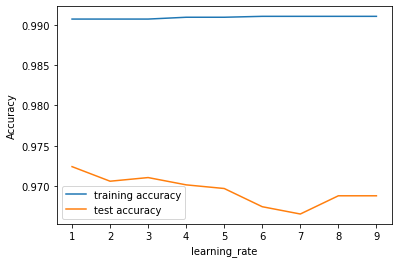

In [ ]:

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('CatBoost Classifier',acc_test_cat,f1_score_test_cat,
             recall_score_train_cat,precision_score_train_cat)

## 5.9. XGBoost Classifier

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning. In this post you will discover how you can install and create your first XGBoost model in Python

In [ ]:
#  XGBoost Classifier Model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier()

# fit the model 
xgb.fit(X_train,y_train)

[15:10:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
#predicting the target value from the model for the samples
y_train_xgb = xgb.predict(X_train)
y_test_xgb = xgb.predict(X_test)

In [ ]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_xgb = metrics.accuracy_score(y_train,y_train_xgb)
acc_test_xgb = metrics.accuracy_score(y_test,y_test_xgb)
print("XGBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print()

f1_score_train_xgb = metrics.f1_score(y_train,y_train_xgb)
f1_score_test_xgb = metrics.f1_score(y_test,y_test_xgb)
print("XGBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_xgb))
print("XGBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_xgb))
print()

recall_score_train_xgb = metrics.recall_score(y_train,y_train_xgb)
recall_score_test_xgb = metrics.recall_score(y_test,y_test_xgb)
print("XGBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_xgb))
print("XGBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_train_xgb))
print()

precision_score_train_xgb = metrics.precision_score(y_train,y_train_xgb)
precision_score_test_xgb = metrics.precision_score(y_test,y_test_xgb)
print("XGBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_xgb))
print("XGBoost Classifier : precision on test Data: {:.3f}".format(precision_score_train_xgb))

XGBoost Classifier : Accuracy on training Data: 0.987
XGBoost Classifier : Accuracy on test Data: 0.969

XGBoost Classifier : f1_score on training Data: 0.988
XGBoost Classifier : f1_score on test Data: 0.973

XGBoost Classifier : Recall on training Data: 0.993
XGBoost Classifier : Recall on test Data: 0.993

XGBoost Classifier : precision on training Data: 0.984
XGBoost Classifier : precision on test Data: 0.984


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('XGBoost Classifier',acc_test_xgb,f1_score_test_xgb,
             recall_score_train_xgb,precision_score_train_xgb)

## 6. Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [ ]:
# Creating the dataframe
result = pd.DataFrame({ 
    'ML Model' : ML_Model,
    'Configuration': ML_Config,
    'Accuracy' : [f"{acc * 100:.3f}%" for acc in accuracy],
    'F1 Score' : [f"{f1 * 100:.3f}%" for f1 in f1_score],
    'Recall'   : [f"{rec * 100:.3f}%" for rec in recall],
    'Precision': [f"{prec * 100:.3f}%" for prec in precision],
    'ROC_AUC'  : [f"{roc * 100:.3f}%" for roc in auc_roc],
})

# Displaying the result
result

In [43]:
# Creating the dataframe
result = pd.DataFrame({ 
    'ML Model' : ML_Model,
    'Configuration': ML_Config,
    'Accuracy' : [f"{acc * 100:.3f}%" for acc in accuracy],
    'F1 Score' : [f"{f1 * 100:.3f}%" for f1 in f1_score],
    'Recall'   : [f"{rec * 100:.3f}%" for rec in recall],
    'Precision': [f"{prec * 100:.3f}%" for prec in precision],
    'ROC_AUC'  : [f"{roc * 100:.3f}%" for roc in auc_roc],
})

# Displaying the result
result

ML Model            Configuration Accuracy F1 Score   Recall  \
0  Support Vector Machine            Original Data  96.608%  97.037%  97.849%   
1  Support Vector Machine          Normalized Data  96.427%  96.879%  97.689%   
2  Support Vector Machine              After SMOTE  96.291%  96.759%  97.530%   
3  Support Vector Machine  SMOTE and Normalization  96.472%  96.917%  97.689%   
4  Support Vector Machine              SelectKBest  96.517%  96.953%  97.610%   
5  Support Vector Machine                    RFECV  96.382%  96.830%  97.371%   
6  Support Vector Machine                      PCA  96.156%  96.628%  97.052%   

  Precision  ROC_AUC  
0   96.238%  98.889%  
1   96.081%  99.174%  
2   96.000%  98.817%  
3   96.157%  99.173%  
4   96.305%  99.180%  
5   96.296%  99.208%  
6   96.209%  99.218%

In [36]:
result

ML Model  Accuracy  f1_score  Recall  Precision  ROC_AUC
0  Support Vector Machine     0.966     0.970   0.978      0.962    0.989
1  Support Vector Machine     0.964     0.969   0.977      0.961    0.992
2  Support Vector Machine     0.963     0.968   0.975      0.960    0.988
3  Support Vector Machine     0.965     0.969   0.977      0.962    0.992
4  Support Vector Machine     0.965     0.970   0.976      0.963    0.992
5  Support Vector Machine     0.964     0.968   0.974      0.963    0.992
6  Support Vector Machine     0.962     0.966   0.971      0.962    0.992

ML Model  Accuracy  f1_score  Recall  Precision
0           Logistic Regression     0.934     0.941   0.943      0.927
1           K-Nearest Neighbors     0.956     0.961   0.991      0.989
2        Support Vector Machine     0.964     0.968   0.980      0.965
3        Naive Bayes Classifier     0.605     0.454   0.292      0.997
4                 Decision Tree     0.961     0.965   0.991      0.993
5                 Random Forest     0.967     0.970   0.992      0.991
6  Gradient Boosting Classifier     0.974     0.977   0.994      0.986
7           CatBoost Classifier     0.972     0.975   0.994      0.989
8            XGBoost Classifier     0.969     0.973   0.993      0.984
9        Multi-layer Perceptron     0.971     0.974   0.992      0.985

In [ ]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)


ML Model  Accuracy  f1_score  Recall  Precision
0  Gradient Boosting Classifier     0.974     0.977   0.994      0.986
1           CatBoost Classifier     0.972     0.975   0.994      0.989
2        Multi-layer Perceptron     0.971     0.974   0.992      0.985
3            XGBoost Classifier     0.969     0.973   0.993      0.984
4                 Random Forest     0.967     0.970   0.992      0.991
5        Support Vector Machine     0.964     0.968   0.980      0.965
6                 Decision Tree     0.961     0.965   0.991      0.993
7           K-Nearest Neighbors     0.956     0.961   0.991      0.989
8           Logistic Regression     0.934     0.941   0.943      0.927
9        Naive Bayes Classifier     0.605     0.454   0.292      0.997

In [ ]:
import pickle

# dump information to that file
pickle.dump(gbc, open('pickle/model.pkl', 'wb'))

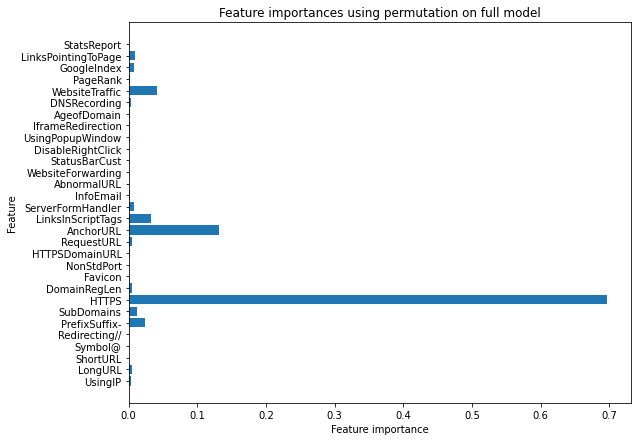

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), gbc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## 7. Conclusion

1. The final take away form this project is to explore various machine learning models, perform Exploratory Data Analysis on phishing dataset and understanding their features. 
2. Creating this notebook helped me to learn a lot about the features affecting the models to detect whether URL is safe or not, also I came to know how to tuned model and how they affect the model performance.
3. The final conclusion on the Phishing dataset is that the some feature like "HTTTPS", "AnchorURL", "WebsiteTraffic" have more importance to classify URL is phishing URL or not. 
4. Gradient Boosting Classifier currectly classify URL upto 97.4% respective classes and hence reduces the chance of malicious attachments.


---

# note

- Key Differences:
Feature Selection retains original features but reduces the number of them. It works on identifying which features are most important for model performance.
Dimensionality Reduction creates entirely new features that are combinations of the original ones. It doesn’t select features; instead, it transforms them into a smaller set of new dimensions.
- Do You Need Both?
Yes, they can be used together. You might first apply feature selection to remove irrelevant features, then apply dimensionality reduction to the remaining features to reduce multicollinearity and improve performance.
For example, you can start with feature selection (e.g., filtering out low-variance features) and then apply PCA to further reduce dimensionality.
- Practical Example:
Feature Selection: You might first remove irrelevant features using a filter method (e.g., correlation threshold).
Dimensionality Reduction: After selecting the relevant features, you apply PCA to reduce redundancy and capture the main sources of variance.

---

To represent your results comprehensively across three datasets and seven models in your research paper, you can use a combination of both **separate** and **combined** tables and figures. Here's a more detailed breakdown:

### 1. **Separate Tables for Each Dataset:**

Create a table for each dataset where you compare the performance of all seven models across multiple metrics like Accuracy, Precision, Recall, F1-Score, and AUC-ROC. 

#### Example Tables:

**Table 1: Performance on Dataset 1**

| Model                  | Accuracy (%) | Precision | Recall  | F1-Score | AUC-ROC |
|------------------------|--------------|-----------|---------|----------|---------|
| Support Vector Machine (SVM) | 91.5         | 0.92      | 0.90    | 0.91     | 0.93    |
| Random Forest          | 93.2         | 0.94      | 0.91    | 0.92     | 0.95    |
| AdaBoost               | 89.7         | 0.90      | 0.89    | 0.89     | 0.91    |
| Gradient Boosting      | 92.4         | 0.93      | 0.91    | 0.92     | 0.94    |
| XGBoost                | 93.8         | 0.94      | 0.92    | 0.93     | 0.96    |
| LightGBM               | 93.4         | 0.94      | 0.91    | 0.92     | 0.95    |
| CatBoost               | 94.0         | 0.95      | 0.92    | 0.93     | 0.96    |

**Table 2: Performance on Dataset 2**

| Model                  | Accuracy (%) | Precision | Recall  | F1-Score | AUC-ROC |
|------------------------|--------------|-----------|---------|----------|---------|
| Support Vector Machine (SVM) | 89.3         | 0.90      | 0.88    | 0.89     | 0.91    |
| Random Forest          | 90.5         | 0.91      | 0.89    | 0.90     | 0.92    |
| AdaBoost               | 88.6         | 0.89      | 0.87    | 0.88     | 0.90    |
| Gradient Boosting      | 89.9         | 0.91      | 0.88    | 0.89     | 0.91    |
| XGBoost                | 91.1         | 0.92      | 0.89    | 0.90     | 0.93    |
| LightGBM               | 90.7         | 0.91      | 0.88    | 0.89     | 0.92    |
| CatBoost               | 91.3         | 0.92      | 0.89    | 0.90     | 0.93    |

**Table 3: Performance on Dataset 3**

| Model                  | Accuracy (%) | Precision | Recall  | F1-Score | AUC-ROC |
|------------------------|--------------|-----------|---------|----------|---------|
| Support Vector Machine (SVM) | 92.1         | 0.93      | 0.91    | 0.92     | 0.94    |
| Random Forest          | 93.8         | 0.94      | 0.92    | 0.93     | 0.96    |
| AdaBoost               | 90.3         | 0.91      | 0.89    | 0.90     | 0.92    |
| Gradient Boosting      | 91.7         | 0.92      | 0.90    | 0.91     | 0.94    |
| XGBoost                | 94.2         | 0.95      | 0.92    | 0.93     | 0.97    |
| LightGBM               | 93.5         | 0.94      | 0.91    | 0.92     | 0.96    |
| CatBoost               | 94.6         | 0.95      | 0.93    | 0.94     | 0.97    |

### 2. **Combined Table for All Datasets:**

You can also create a combined table to summarize the overall performance of each model across all datasets by averaging the performance metrics. 

#### Example Combined Table:

| Model                  | Avg. Accuracy (%) | Avg. Precision | Avg. Recall | Avg. F1-Score | Avg. AUC-ROC |
|------------------------|------------------|----------------|-------------|--------------|-------------|
| Support Vector Machine (SVM) | 91.0         | 0.92           | 0.90        | 0.91         | 0.93        |
| Random Forest          | 92.5             | 0.93           | 0.91        | 0.92         | 0.94        |
| AdaBoost               | 89.5             | 0.90           | 0.88        | 0.89         | 0.91        |
| Gradient Boosting      | 91.3             | 0.92           | 0.90        | 0.91         | 0.93        |
| XGBoost                | 93.0             | 0.94           | 0.91        | 0.92         | 0.95        |
| LightGBM               | 92.5             | 0.93           | 0.90        | 0.91         | 0.94        |
| CatBoost               | 93.3             | 0.94           | 0.91        | 0.93         | 0.95        |

### 3. **Separate Figures (Bar Charts) for Each Dataset:**

For each dataset, create bar charts showing the performance of each model. You can create a chart for each metric (e.g., Accuracy, F1-Score) or combine multiple metrics into a single grouped bar chart.

#### Example: Accuracy Comparison for Dataset 1

- X-axis: Models
- Y-axis: Accuracy (%)
- Bars: Each bar represents a model’s performance.

You can repeat this for Dataset 2 and Dataset 3.

### 4. **Combined Figures (Bar Charts or Line Graphs):**

You can also create combined figures to show the performance of each model across all datasets:

- **Grouped Bar Chart:** Each group of bars represents a dataset, with bars for each model.
  
  Example:
  - X-axis: Models
  - Y-axis: Accuracy (%)
  - Bar groups: One group for each dataset, with three bars for each model representing performance on Dataset 1, Dataset 2, and Dataset 3.

- **Line Graphs:** Plot each dataset’s performance as a line, with the models on the x-axis and performance metrics on the y-axis. This allows readers to see how each model performs across all datasets in one graph.

  Example:
  - X-axis: Models
  - Y-axis: Accuracy (%)
  - Lines: One line for each dataset, connecting the performance points of each model.

### 5. **Heatmap Representation:**

Heatmaps are a great way to visualize model performance across multiple datasets and metrics in one view. 

- **Heatmap Rows:** Models
- **Heatmap Columns:** Datasets (and/or metrics)
- **Cell Colors:** Represent performance scores (darker colors for better scores).

### 6. **Statistical Comparison (Optional):**

You can include statistical tests (e.g., paired t-tests, ANOVA) to show whether the differences in performance between models or datasets are statistically significant. These results can be summarized in an additional table or figure.

### 7. **Discussion and Analysis:**

Include a section where you discuss the results represented by the tables and figures:

- **Performance Trends:** Discuss which models consistently performed well across all datasets and why.
- **Dataset Differences:** Analyze how the performance varied between datasets and what factors might have contributed to these differences.
- **Model Insights:** Provide insights into why certain models (e.g., XGBoost, CatBoost) outperformed others based on their characteristics (e.g., handling of imbalanced data, robustness to noisy features).

### 8. **Combining All Results in a Clear Structure:**

You can organize the presentation of results as follows:

1. **Introduction of the Datasets and Models:** Briefly describe the datasets and models used.
2. **Separate Results by Dataset (Tables and Figures):** Present results for each dataset individually.
3. **Combined Results (Tables and Figures):** Provide a summary view showing how models performed across all datasets.
4. **Discussion and Insights:** Analyze the results and highlight key takeaways.

This multi-layered approach ensures clarity and allows readers to grasp both the individual and combined performance of models, making your research presentation thorough and easy to follow.

---

To effectively present the results from three datasets and seven models in a research paper, you need to ensure clarity, comparison, and insight into which models performed best across the datasets. Here’s a recommended approach:

### 1. **Tabular Representation:**
   Tables are a concise way to compare the performance of different models across multiple datasets. You can use a table where each row represents a model, and each column represents a dataset with corresponding performance metrics (like accuracy, precision, recall, F1-score, AUC-ROC).

   Example:

   | Model               | Dataset 1: Accuracy (%) | Dataset 2: Accuracy (%) | Dataset 3: Accuracy (%) | Avg. Accuracy (%) |
   |---------------------|------------------------|------------------------|------------------------|------------------|
   | Support Vector Machine (SVM) | 91.5                   | 89.3                   | 92.1                   | 91.0             |
   | Random Forest       | 93.2                   | 90.5                   | 93.8                   | 92.5             |
   | AdaBoost            | 89.7                   | 88.6                   | 90.3                   | 89.5             |
   | Gradient Boosting   | 92.4                   | 89.9                   | 91.7                   | 91.3             |
   | XGBoost             | 93.8                   | 91.1                   | 94.2                   | 93.0             |
   | LightGBM            | 93.4                   | 90.7                   | 93.5                   | 92.5             |
   | CatBoost            | 94.0                   | 91.3                   | 94.6                   | 93.3             |

   In the table above, you can include multiple metrics (e.g., F1-score, AUC-ROC) in separate columns if necessary. Additionally, you can add a column for the **average performance** across all datasets to highlight the overall best model.

### 2. **Graphical Representation:**
   Visuals are crucial for quickly conveying insights. Here are some effective options:

   - **Bar Charts:** Use grouped bar charts to show model performance across datasets. Each group of bars represents one model, with bars for each dataset.
   
   Example:

   - **Heatmaps:** A heatmap is useful for visualizing performance metrics across models and datasets. Each cell color represents performance (e.g., accuracy) for a particular model-dataset pair, with darker colors indicating better performance.
   
   - **Line Graphs:** If you want to show how performance metrics vary across datasets for each model, you can use line graphs where each line represents a model and the x-axis represents datasets.

   Example (for accuracy comparison):

   ```
   y-axis: Accuracy (%)
   x-axis: Dataset 1, Dataset 2, Dataset 3
   Lines: One for each model (with different colors)
   ```

### 3. **Descriptive Analysis and Insights:**
   In addition to tables and charts, you should include a discussion section that analyzes the results:

   - **Performance Comparison:** Highlight which models consistently performed well across datasets and which struggled.
   - **Dataset Analysis:** Discuss any notable differences in performance across datasets and why certain models performed better on specific datasets.
   - **Model Ranking:** Rank the models based on average performance across datasets.
   - **Insights:** Provide insights into why certain models excelled (e.g., certain models might perform better on imbalanced data or certain types of features).

### 4. **Statistical Significance (Optional):**
   If your research is focused on rigorous statistical comparison, you can include statistical tests like paired t-tests, Wilcoxon signed-rank tests, or ANOVA to compare model performances across datasets.

### 5. **Conclusion Section:**
   Summarize the overall findings from the analysis, highlighting which models are best suited for phishing website detection based on your experiments.

This multi-faceted approach of combining tables, visuals, and insightful analysis will help your readers easily understand the results and derive meaningful conclusions from your research.

---